# Ground Truth from Stand-Up Comedy Transcripts

### 1. Seperate the transcript into individual sentences and map the timestamps of the audio with the sentences

Forced Alignment was done via the aid of Aeneas

### 2. Use Laughter Detection Tool to find the laughter in the given audio

Laughter Detection is Done via

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ?usp=sharing&pli=1&authuser=2#scrollTo=R3LqFPm9biYP

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ#scrollTo=R3LqFPm9biYP

### 3. Match the funny sentences with the laughter

In [1]:
import json

In [67]:
dg_laugh_times = {
    'laugh_0': {'start': 14.268125337655322, 'end': 19.352169998199173},
    'laugh_1': {'start': 33.29229245452908, 'end': 34.18258598955519},
    'laugh_2': {'start': 37.7906176841347, 'end': 53.44104087880425},
    'laugh_3': {'start': 68.88060507833603, 'end': 73.82407707545471},
    'laugh_4': {'start': 85.49160813974429, 'end': 88.60763551233568},
    'laugh_5': {'start': 107.8426616243472, 'end': 110.95868899693859},
}

In [2]:
def create_laughter_map(laugh_times, transcript_data_path):
    with open(transcript_data_path, 'r') as file:
        transcript_data = json.load(file)

    laughter_map = {}
    used_sentences = set()
    i = 1

    for laugh_info in laugh_times.values():
        funny_sent = []
        laugh_start = laugh_info['start']
        laugh_end = laugh_info['end']
        for fragment in transcript_data["fragments"]:
            start_frag = float(fragment['begin'])
            end_frag = float(fragment['end'])
            if end_frag < laugh_start:
                sentences = " ".join(fragment['lines']).strip()
                if sentences and sentences not in used_sentences:
                    funny_sent.append(sentences)
                    used_sentences.add(sentences)
                if len(funny_sent) > 2:
                    funny_sent.pop(0)
        funny_sent_comb = " ".join(funny_sent)
        if funny_sent_comb:
            laughter_map[f"laugh {i}"] = [laugh_start, laugh_end, funny_sent_comb]
            i += 1

    return laughter_map

In [68]:
dg_laughter_map = create_laughter_map(dg_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/dg/dg_output.json")

for laugh_num, info in dg_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 14.268125337655322
End Time: 19.352169998199173
Funny Sentences: I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying.

laugh 2
Start Time: 33.29229245452908
End Time: 34.18258598955519
Funny Sentences: The sweetest thing he was allowed was mints. He was just allowed to have mints.

laugh 3
Start Time: 37.7906176841347
End Time: 53.44104087880425
Funny Sentences: So he would steal mints by the handful.

laugh 4
Start Time: 68.88060507833603
End Time: 73.82407707545471
Funny Sentences: And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.

laugh 5
Start Time: 85.49160813974429
End Time: 88.60763551233568
Funny Sentences: You know, we'd trade jerk- chicken recipes and stuff.

laugh 6
Start Time: 107.8426616243472
End Time: 110.95868899693

In [69]:
dg_funny_sentences = []
for value in dg_laughter_map.values():
  dg_funny_sentences.append(value[2])

for sentences in dg_funny_sentences:
  print(sentences, "\n")

I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying. 

The sweetest thing he was allowed was mints. He was just allowed to have mints. 

So he would steal mints by the handful. 

And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool. 

You know, we'd trade jerk- chicken recipes and stuff. 

And he goes, "Shut up." And she goes, "Don't you talk to me like that, I am a grown-up, you will respect me." 



In [23]:
def make_sent_list(laughter_map):
  sentences = []
  for value in laughter_map.values():
    sentences.append(value[2])
  return sentences

### 3. Amplitude graph

In [8]:
!pip install librosa

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_mp3(audio_file, name):
    data, sr = librosa.load(audio_file, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color='pink')
    plt.title(f"Waveform of {name}")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [11]:
dg_audio = "/content/DG_W_audio_11.mp3"

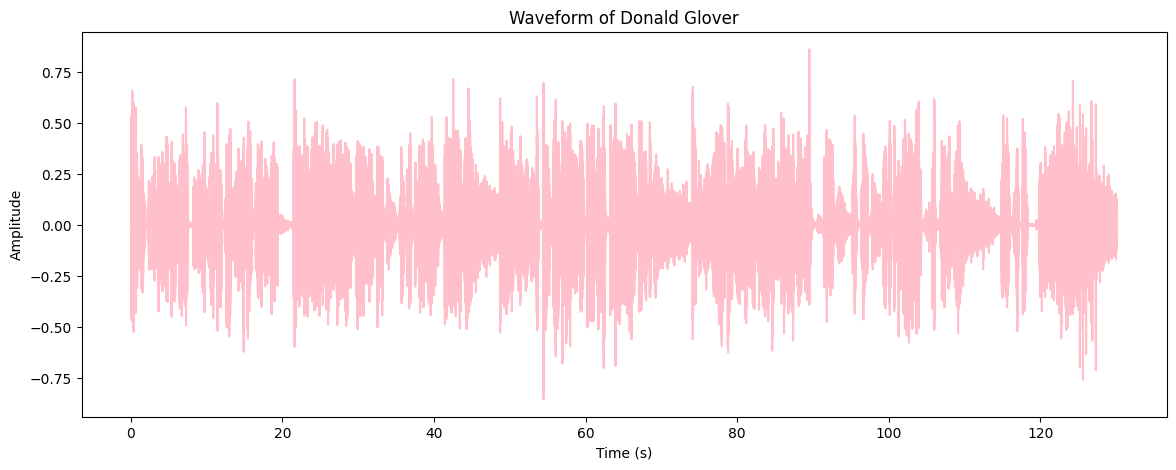

In [12]:
plot_mp3(dg_audio, "Donald Glover")

In [13]:
def plot_mp3_laugh_start(audio, name, laughter_map):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")
    for info in laughter_map.values():
        plt.axvline(x=info[0], color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=info[1], color='red', linestyle='--', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

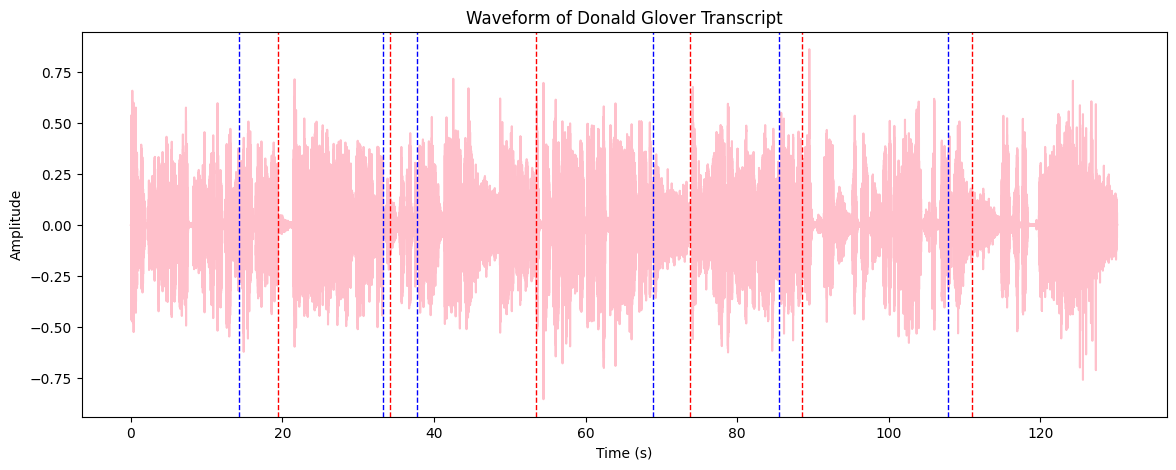

In [14]:
plot_mp3_laugh_start(dg_audio, "Donald Glover", dg_laughter_map)

In [15]:
def split_sentence(sentence, max_length=80):
    lines = []
    while len(sentence) > max_length:
        split_index = sentence.rfind(' ', 0, max_length)
        if split_index == -1:

            split_index = max_length
        lines.append(sentence[:split_index].strip())
        sentence = sentence[split_index:].strip()
    lines.append(sentence)
    return lines

def plot_mp3_laugh_sent(audio, name, laughter_map, sentences):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")

    for info in laughter_map.values():
        start = info[0]
        end = info[1]
        sentence = info[2]
        if start != list(laughter_map.keys())[-1]:
            lines = split_sentence(sentence)
            label_text = '\n'.join(lines)
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), label_text, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)
        else:
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), sentence, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)

        plt.axvline(x=start, color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=end, color='green', linestyle=':', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

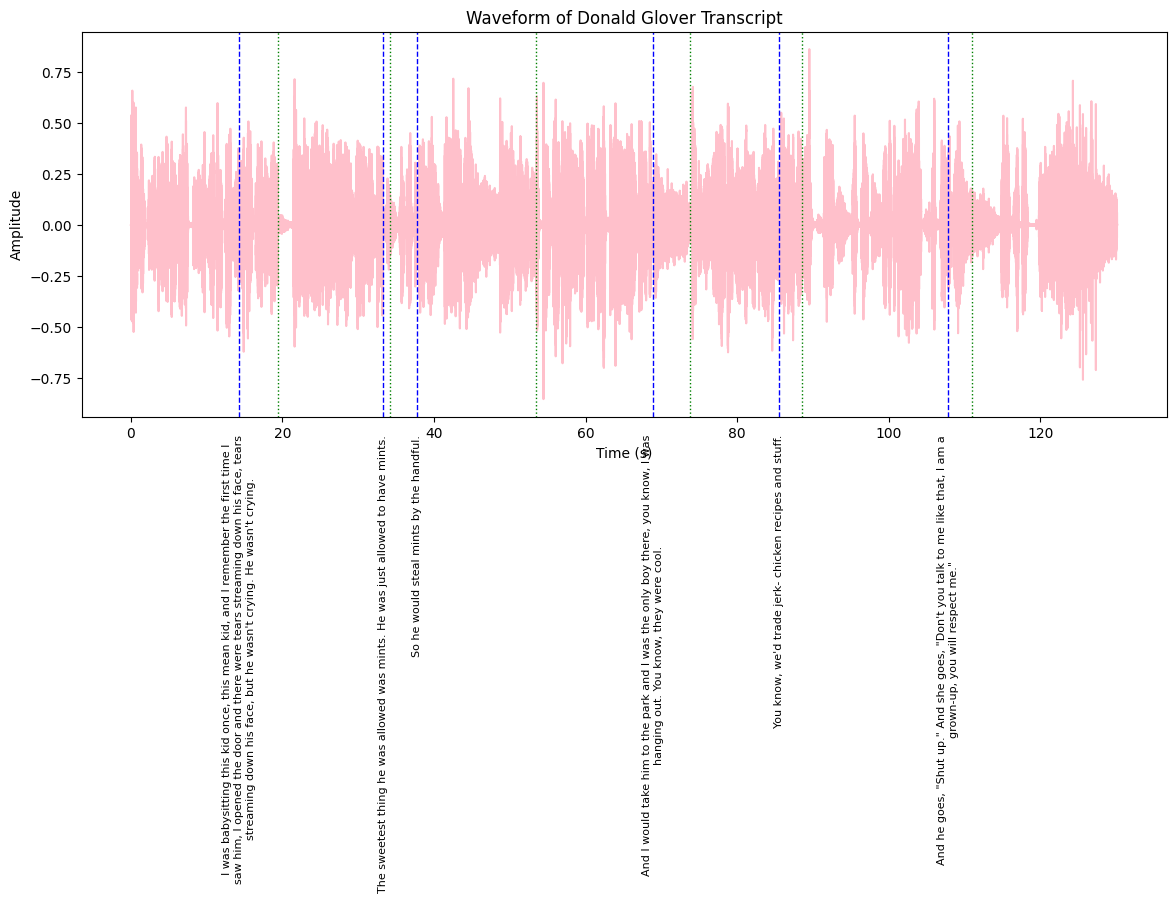

In [16]:
plot_mp3_laugh_sent(dg_audio, "Donald Glover", dg_laughter_map, sentences)

## Anthony Jeselnik

In [4]:
aj_laugh_times = {
    "laugh_1": {'start': 16.898010610079577, 'end': 19.405759757483896},
    "laugh_2": {'start': 29.08520272830618, 'end': 31.1007768093975},
    "laugh_3": {'start': 34.87411898446381, 'end': 36.23345964380447},
    "laugh_4": {'start': 43.756707086017435, 'end': 48.91282682834407},
    "laugh_5": {'start': 86.5056271314892, 'end': 88.49776430466086},
    "laugh_6": {'start': 93.98200075786283, 'end': 100.70839333080713},
    "laugh_7": {'start': 114.65335354300872, 'end': 120.2782114437287}
}

In [5]:
aj_laughter_map = create_laughter_map(aj_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/aj/aj_output.json")

for laugh_num, info in aj_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 16.898010610079577
End Time: 19.405759757483896
Funny Sentences: When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.

laugh 2
Start Time: 29.08520272830618
End Time: 31.1007768093975
Funny Sentences: Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.

laugh 3
Start Time: 34.87411898446381
End Time: 36.23345964380447
Funny Sentences: Weird joke to clap for, but sure.

laugh 4
Start Time: 43.756707086017435
End Time: 48.91282682834407
Funny Sentences: My mom actually should've been on one of the planes that crashed on 9/11.

laugh 5
Start Time: 86.5056271314892
End Time: 88.49776430466086
Funny Sentences: And when I did that, my mom would act weird. She'd pull me aside and say, "Anthony, who's your new friend?

laugh 6
Start Time: 93.98200075786283
End Time: 100.70839333080713
Fun

In [73]:
aj_sentences = make_sent_list(aj_laughter_map)
print(aj_sentences)

['When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.', 'Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.', 'Weird joke to clap for, but sure.', "My mom actually should've been on one of the planes that crashed on 9/11.", 'And when I did that, my mom would act weird. She\'d pull me aside and say, "Anthony, who\'s your new friend?', 'And I would say, "Shut up, Mom, that\'s racist. Put your money away.', "And we never talk, write letters or any of that shit. 'Cause they're all in jail for the exact same thing."]


In [20]:
aj_audio = "/content/AJ_TP_audio_15.mp3"

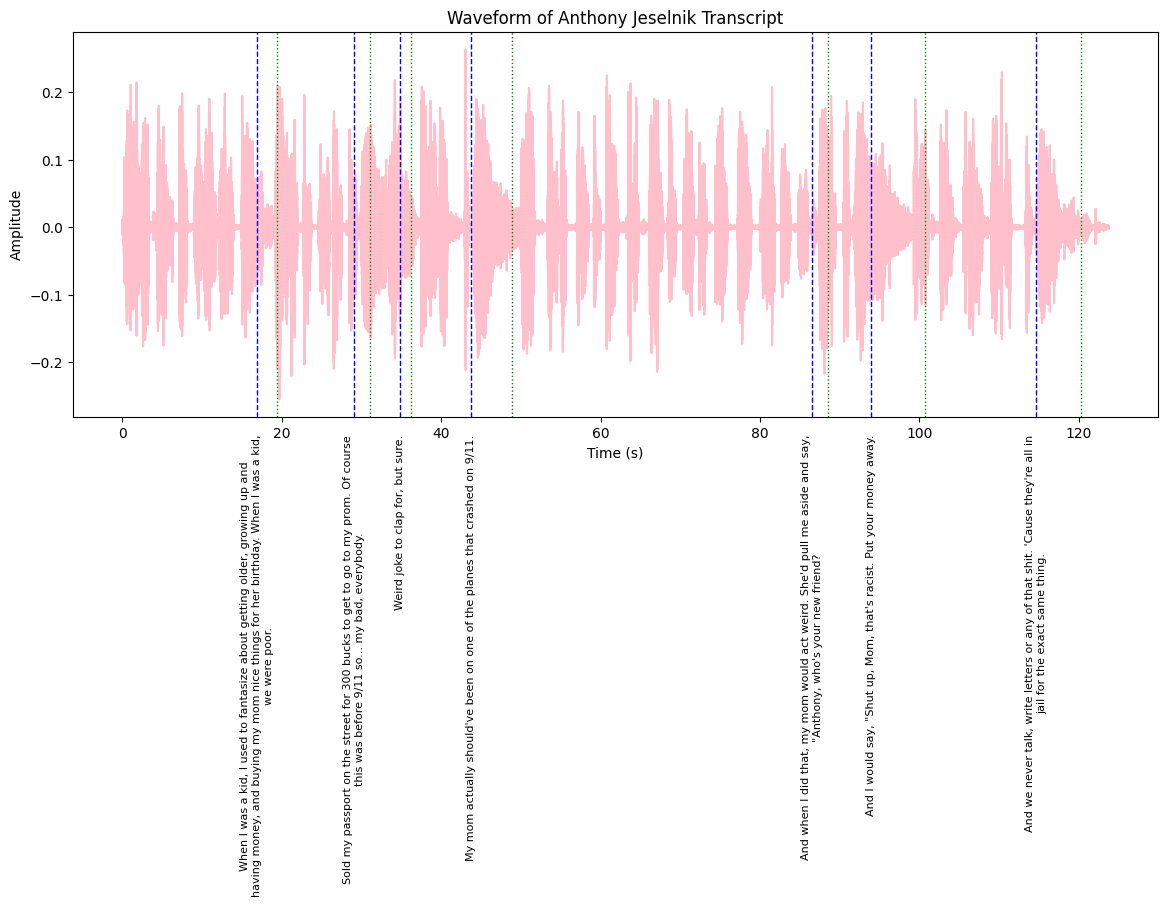

In [21]:
plot_mp3_laugh_sent(aj_audio, "Anthony Jeselnik", aj_laughter_map, aj_sentences)

Chelsea Peretti: One of the Greats

In [6]:
cp_laugh_times = {
    "laugh_1": {'start': 13.212189973614773, 'end': 18.87791556728232},
    "laugh_2": {'start': 24.966807387862794, 'end': 28.352137203166222},
    "laugh_3": {'start': 29.574617414248017, 'end': 32.654327176780996},
    "laugh_4": {'start': 59.00817941952506, 'end': 67.30693931398416},
    "laugh_5": {'start': 69.09364116094986, 'end': 72.4554617414248},
    "laugh_6": {'start': 74.38321899736147, 'end': 88.4887598944591}
}

In [7]:
cp_laughter_map = create_laughter_map(cp_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/cp/cp_output.json")

for laugh_num, info in cp_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 13.212189973614773
End Time: 18.87791556728232
Funny Sentences: It was a photoset of 500 photos. I'm not exaggerating.

laugh 2
Start Time: 24.966807387862794
End Time: 28.352137203166222
Funny Sentences: I'm just obsessed with the entire photoset. I'm just like, "Next, next, next, next, more, more, more, more."

laugh 3
Start Time: 59.00817941952506
End Time: 67.30693931398416
Funny Sentences: She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.

laugh 4
Start Time: 69.09364116094986
End Time: 72.4554617414248
Funny Sentences: My hubby fixed the door. My hubby is sleeping.

laugh 5
Start Time: 74.38321899736147
End Time: 88.4887598944591
Funny Sentences: He breathed in, he breathed out. He breathed in, he breathed out."



In [76]:
cp_sentences = make_sent_list(cp_laughter_map)
print(cp_sentences)

["It was a photoset of 500 photos. I'm not exaggerating.", 'I\'m just obsessed with the entire photoset. I\'m just like, "Next, next, next, next, more, more, more, more."', 'She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.', 'My hubby fixed the door. My hubby is sleeping.', 'He breathed in, he breathed out. He breathed in, he breathed out."']


In [26]:
cp_audio = "/content/CP_OTG_audio_18.mp3"

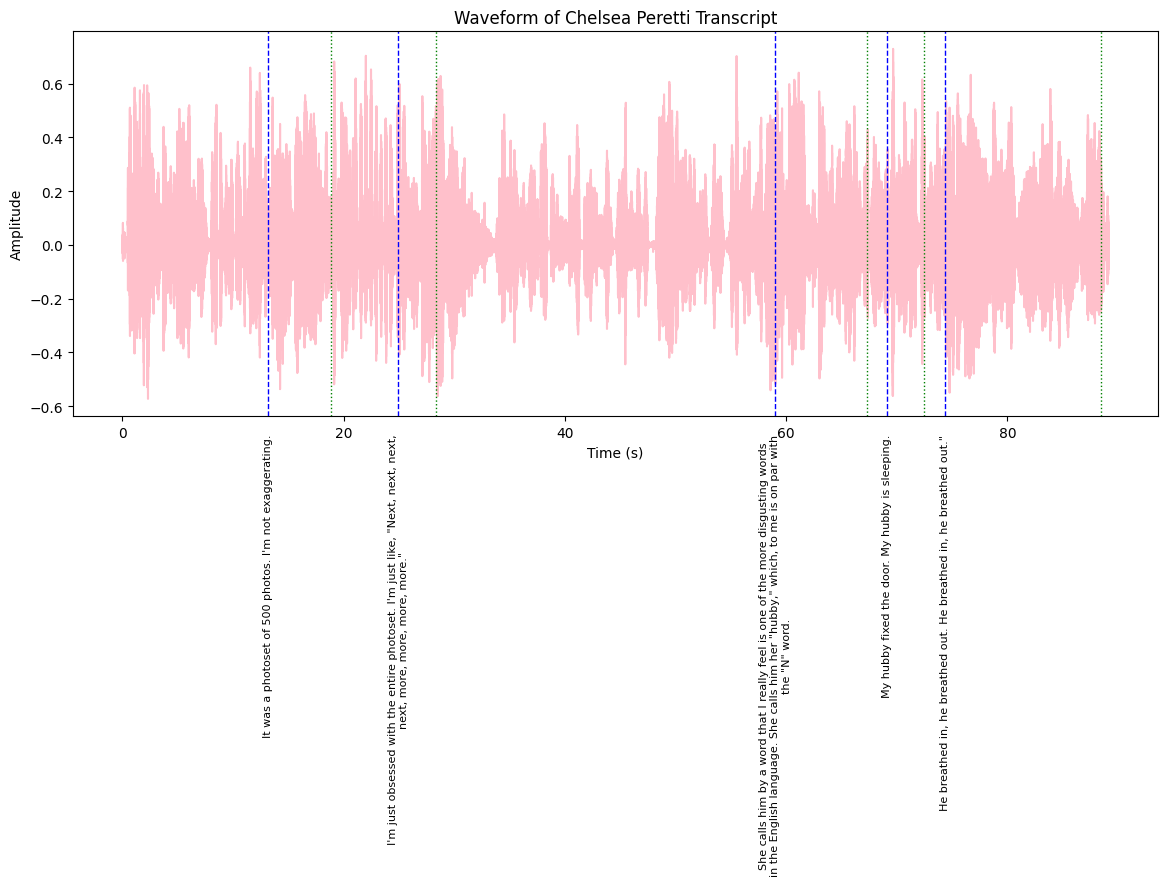

In [27]:
plot_mp3_laugh_sent(cp_audio, "Chelsea Peretti", cp_laughter_map, cp_sentences)

Louis C.K

In [8]:
lck_laugh_times = {
    "laugh_1": {'start': 3.206314344543583, 'end': 4.668016472203157},
    "laugh_2": {'start': 17.375394646533973, 'end': 20.77031571722718},
    "laugh_3": {'start': 31.709505833905286, 'end': 41.44632807137955},
    "laugh_4": {'start': 45.124159231297185, 'end': 48.943445435827044},
    "laugh_5": {'start': 49.34423472889499, 'end': 55.403225806451616},
    "laugh_6": {'start': 57.94941660947152, 'end': 64.03198352779684},
    "laugh_7": {'start': 65.54083733699383, 'end': 67.37975291695264}
}

In [9]:
lck_laughter_map = create_laughter_map(lck_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/lck/lck_output.json")

for laugh_num, info in lck_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 17.375394646533973
End Time: 20.77031571722718
Funny Sentences: Jesus was Jewish. And he said, "I don't think so."

laugh 2
Start Time: 31.709505833905286
End Time: 41.44632807137955
Funny Sentences: He was like, "Dude, Jesus couldn't be Jewish. Think about it."

laugh 3
Start Time: 45.124159231297185
End Time: 48.943445435827044
Funny Sentences: What was he? Catholic?

laugh 4
Start Time: 49.34423472889499
End Time: 55.403225806451616
Funny Sentences: Okay, Jesus was Catholic and he had a gold chain with a cross.

laugh 5
Start Time: 57.94941660947152
End Time: 64.03198352779684
Funny Sentences: "That finally makes sense. I didn't even know.

laugh 6
Start Time: 65.54083733699383
End Time: 67.37975291695264
Funny Sentences: Oh, fuck, that's me!



In [79]:
lck_sentences = make_sent_list(lck_laughter_map)
print(lck_sentences)

['Jesus was Jewish. And he said, "I don\'t think so."', 'He was like, "Dude, Jesus couldn\'t be Jewish. Think about it."', 'What was he? Catholic?', 'Okay, Jesus was Catholic and he had a gold chain with a cross.', '"That finally makes sense. I didn\'t even know.', "Oh, fuck, that's me!"]


In [32]:
lck_audio = "/content/LCK_SY_audio_06.mp3"

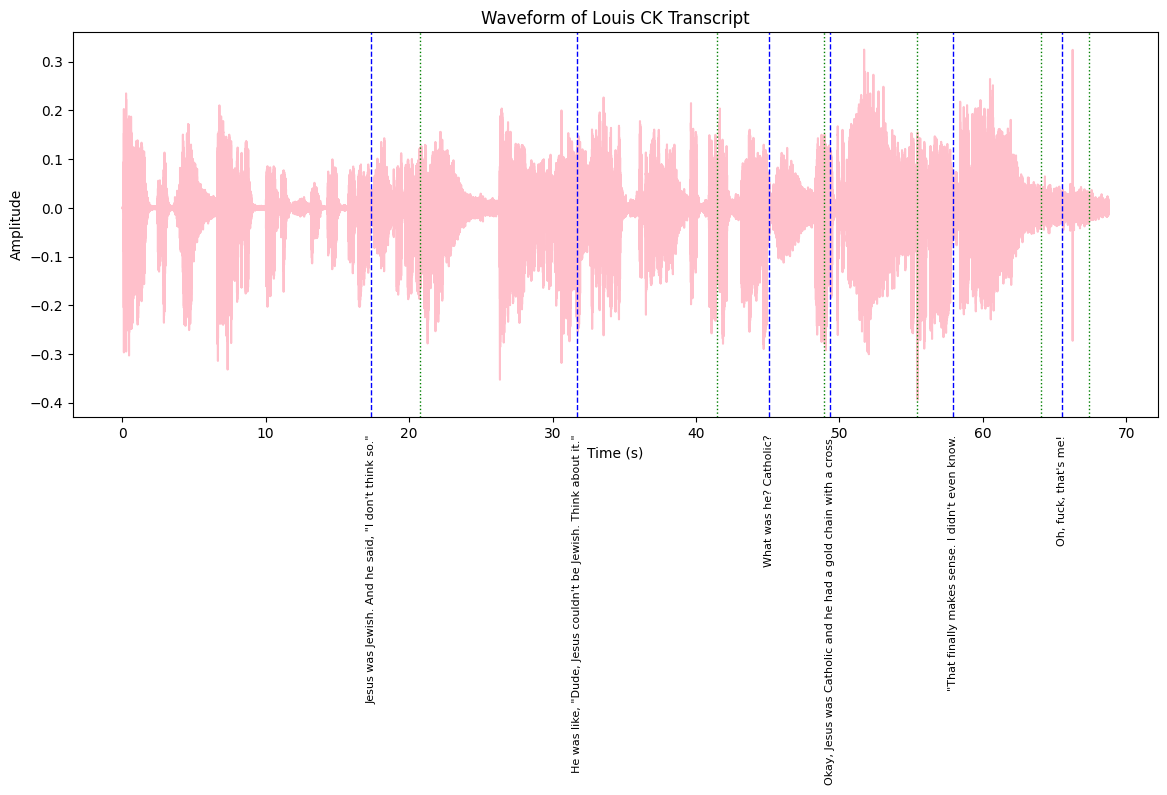

In [33]:
plot_mp3_laugh_sent(lck_audio, "Louis CK", lck_laughter_map, lck_sentences)

John Mulaney

In [80]:
jm_laugh_times = {
    "laugh_1": {'start': 1.9682337516388835, 'end': 5.389211462820752},
    "laugh_2": {'start': 32.54615096460011, 'end': 40.02075294999063},
    "laugh_3": {'start': 41.33290878441655, 'end': 55.48544671286757},
    "laugh_4": {'start': 59.49220827870387, 'end': 65.86553661734406},
    "laugh_5": {'start': 67.85720172316913, 'end': 70.7626896422551},
    "laugh_6": {'start': 73.527589436224, 'end': 74.20709870762315},
    "laugh_7": {'start': 83.9076793407005, 'end': 85.89934444652556},
    "laugh_8": {'start': 97.75560966473121, 'end': 105.9800149840794},
    "laugh_9": {'start': 113.78265592807641, 'end': 125.07656864581381}
}

In [81]:
jm_laughter_map = create_laughter_map(jm_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jm/jm_output.json")

for laugh_num, info in jm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 32.54615096460011
End Time: 40.02075294999063
Funny Sentences: And I said, "Of course I did! On an unrelated note, I'm going to walk out the front door right now."

laugh 2
Start Time: 41.33290878441655
End Time: 55.48544671286757
Funny Sentences: It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them.

laugh 3
Start Time: 59.49220827870387
End Time: 65.86553661734406
Funny Sentences: He's like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?

laugh 4
Start Time: 67.85720172316913
End Time: 70.7626896422551
Funny Sentences: My mom said it could be a sleep shirt. Please deduct this from my 2017 income."

laugh 5
Start Time: 73.527589436224
End Time: 74.20709870762315
Funny Sentences: That sleep shirt bullshit.

laugh 6
Start Time: 83.9076793407005
End Time: 85.89934444652556
Funny Sentences: "Well, if it's too big you can just wear 

In [36]:
print(jm_laughter_map)

{'laugh 1': [32.54615096460011, 40.02075294999063, 'And I said, "Of course I did! On an unrelated note, I\'m going to walk out the front door right now."'], 'laugh 2': [41.33290878441655, 55.48544671286757, "It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them."], 'laugh 3': [59.49220827870387, 65.86553661734406, 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?'], 'laugh 4': [67.85720172316913, 70.7626896422551, 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."'], 'laugh 5': [73.527589436224, 74.20709870762315, 'That sleep shirt bullshit.'], 'laugh 6': [83.9076793407005, 85.89934444652556, '"Well, if it\'s too big you can just wear it as a sleep shirt."'], 'laugh 7': [97.75560966473121, 105.9800149840794, '"Because we don\'t say that when someone gives us a gift because that would not be polite." Oh, I get 

In [82]:
jm_sentences = make_sent_list(jm_laughter_map)
print(jm_sentences)

['And I said, "Of course I did! On an unrelated note, I\'m going to walk out the front door right now."', "It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them.", 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?', 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."', 'That sleep shirt bullshit.', '"Well, if it\'s too big you can just wear it as a sleep shirt."', '"Because we don\'t say that when someone gives us a gift because that would not be polite." Oh, I get it.', "So rather than violate these meaningless politeness rules, I'll just go to bed in a smock like goddamn Ebenezer Scrooge."]


In [38]:
jm_audio = "/content/JM_KDRC_audio_12.mp3"

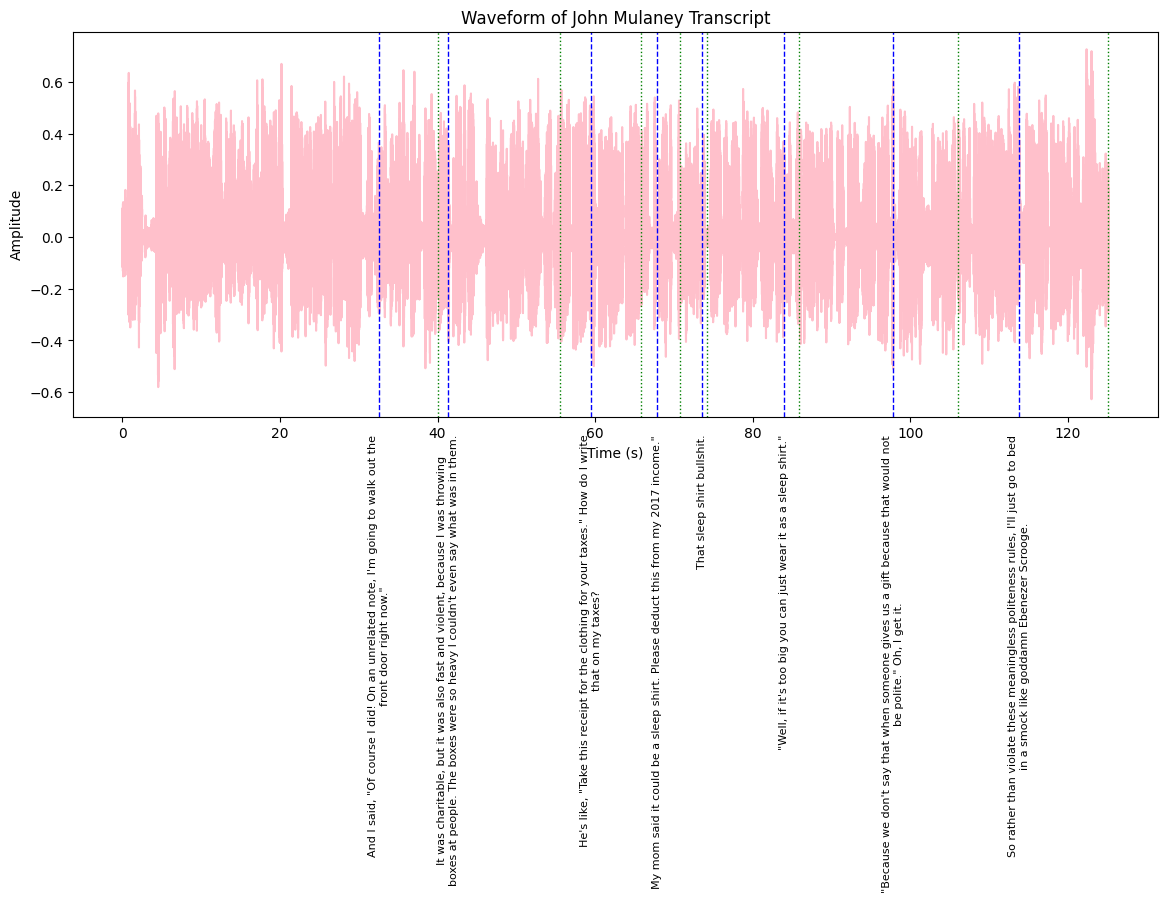

In [39]:
plot_mp3_laugh_sent(jm_audio, "John Mulaney", jm_laughter_map, jm_sentences)

# Other Transcripts

Anthony Jeselnik 2

In [14]:
aj2_laugh_times = {
    'laugh_1': {'start': 53.522616562282536, 'end': 57.25511482254698}, 
    'laugh_3': {'start': 78.78153560658781, 'end': 83.05395499884018}, 
    'laugh_4': {'start': 93.54720482486663, 'end': 96.90410577592206}, 
    }

In [15]:
aj2_laughter_map = create_laughter_map(aj2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/aj2/aj2_output.json")

for laugh_num, info in aj2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 53.522616562282536
End Time: 57.25511482254698
Funny Sentences: Like... Mark Twain out of my grandma's mouth, it would just come to life." And then I couldn't help myself.

laugh 2
Start Time: 78.78153560658781
End Time: 83.05395499884018
Funny Sentences: I said, "And I know my grandma loved it too, because it combined her two favorite things: spending time with her grandchildren, and using the 'N' word." Now I promise you...

laugh 3
Start Time: 93.54720482486663
End Time: 96.90410577592206
Funny Sentences: I am a real comedian. I am a pure comedian.



In [18]:
aj2_sentences = make_sent_list(aj2_laughter_map)
print(aj2_sentences)

['Like... Mark Twain out of my grandma\'s mouth, it would just come to life." And then I couldn\'t help myself.', 'I said, "And I know my grandma loved it too, because it combined her two favorite things: spending time with her grandchildren, and using the \'N\' word." Now I promise you...', 'I am a real comedian. I am a pure comedian.']


Ali Wong

In [17]:
aw_laugh_times = {
    'laugh_1': {'start': 33.00548141086749, 'end': 38.75679218303146}, 
    'laugh_2': {'start': 48.80397998093422, 'end': 55.189108674928505}, 
    'laugh_3': {'start': 60.00142993326978, 'end': 61.76203527168732},    
}

In [18]:
aw_laughter_map = create_laughter_map(aw_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/aw/aw_output.json")

for laugh_num, info in aw_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 33.00548141086749
End Time: 38.75679218303146
Funny Sentences: We were screaming and fighting and yelling and it all came to a climax when she refused to let go of a Texas Instruments TI-82... manual. The manual.

laugh 2
Start Time: 48.80397998093422
End Time: 55.189108674928505
Funny Sentences: We were all required to buy it when we were in eight grade. It cost like $200.

laugh 3
Start Time: 60.00142993326978
End Time: 61.76203527168732
Funny Sentences: All because what? It could graph.



In [22]:
aw_sentences = make_sent_list(aw_laughter_map)
print(aw_sentences)

['We were screaming and fighting and yelling and it all came to a climax when she refused to let go of a Texas Instruments TI-82... manual. The manual.', 'We were all required to buy it when we were in eight grade. It cost like $200.', 'All because what? It could graph.']


Ali Wong 2

In [27]:
aw2_laugh_times = {
    'laugh_1': {'start': 10.269467570183929, 'end': 12.379632139399805}, 
    'laugh_2': {'start': 40.632391093901255, 'end': 42.41430784123911}, 
    'laugh_3': {'start': 48.557231364956436, 'end': 50.08123910939012}, 
    'laugh_4': {'start': 63.211151984511126, 'end': 65.06340755082284}, 
    'laugh_5': {'start': 66.35295256534366, 'end': 68.18176185866407}, 
    'laugh_6': {'start': 92.82379477250726, 'end': 94.91051306873185}, 
    'laugh_7': {'start': 96.62209099709582, 'end': 98.919825750242}, 
    'laugh_8': {'start': 117.02034849951596, 'end': 121.0765537270087}
}

In [28]:
aw2_laughter_map = create_laughter_map(aw2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/aw2/aw2_output.json")

for laugh_num, info in aw2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 10.269467570183929
End Time: 12.379632139399805
Funny Sentences: I need to have children to keep me company when I get older. It's lonely.

laugh 2
Start Time: 40.632391093901255
End Time: 42.41430784123911
Funny Sentences: I'm just kidding. She doesn't have any black friends.

laugh 3
Start Time: 48.557231364956436
End Time: 50.08123910939012
Funny Sentences: Life is not Rush Hour, the movie, OK?

laugh 4
Start Time: 63.211151984511126
End Time: 65.06340755082284
Funny Sentences: I need children to be there for me when I'm older, when I get as old as her. And when I say be there for me, I mean pay for me when my husband isn't around to support me anymore.

laugh 5
Start Time: 66.35295256534366
End Time: 68.18176185866407
Funny Sentences: I'm not trying to be one of those old Chinese ladies who recycles for a living.

laugh 6
Start Time: 92.82379477250726
End Time: 94.91051306873185
Funny Sentences: Old Chinese ladies, they don't give a fuck. They got no shame.

lau

In [29]:
aw2_sentences = make_sent_list(aw2_laughter_map)
print(aw2_sentences)

["I need to have children to keep me company when I get older. It's lonely.", "I'm just kidding. She doesn't have any black friends.", 'Life is not Rush Hour, the movie, OK?', "I need children to be there for me when I'm older, when I get as old as her. And when I say be there for me, I mean pay for me when my husband isn't around to support me anymore.", "I'm not trying to be one of those old Chinese ladies who recycles for a living.", "Old Chinese ladies, they don't give a fuck. They got no shame.", 'They\'re like, "I\'m just gonna recycle... go bald... go to the park, do this shit."', "They wear that to protect themselves from their arch-nemesis, the sun. Their in a contest to see who's gonna burn out first."]


Chelsea Peretti 2

In [30]:
cp2_laugh_times = {
    'laugh_1': {'start': 15.013492907801417, 'end': 21.524804964539005}, 
    'laugh_2': {'start': 29.980141843971627, 'end': 34.64111702127659}, 
    'laugh_3': {'start': 38.31836879432624, 'end': 41.50375886524822}, 
    'laugh_4': {'start': 52.30129432624113, 'end': 61.693510638297866}, 
    'laugh_5.wav': {'start': 64.15281914893616, 'end': 72.79553191489362}, 
    'laugh_6.wav': {'start': 78.39338652482269, 'end': 99.00473404255318}, 
    'laugh_7.wav': {'start': 102.91620567375885, 'end': 107.81140070921985}, 
    'laugh_8.wav': {'start': 111.44180851063828, 'end': 113.994804964539}, 
    'laugh_9.wav': {'start': 116.75859929078013, 'end': 128.51643617021276}, 
    'laugh_10.wav': {'start': 130.69468085106382, 'end': 132.07657801418438}
}

cp2_laughter_map = create_laughter_map(cp2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/cp2/cp2_output.json")

for laugh_num, info in cp2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

cp2_sentences = make_sent_list(cp2_laughter_map)

laugh 1
Start Time: 15.013492907801417
End Time: 21.524804964539005
Funny Sentences: If you really want to piss off a really hot girl, like a model-hot girl, go onto her social media, find a photo where she looks smoking hot, and you're just a regular girl. Go onto her comments and just be like, "People say I look just like you."

laugh 2
Start Time: 29.980141843971627
End Time: 34.64111702127659
Funny Sentences: This is an actual thing. It's not to make them look youthful, you know.

laugh 3
Start Time: 38.31836879432624
End Time: 41.50375886524822
Funny Sentences: "Hi, everyone, same old me."

laugh 4
Start Time: 52.30129432624113
End Time: 61.693510638297866
Funny Sentences: But the reason I know about it is I met a girl who did it, and she was like, "It worked. I did stop sweating out of my armpits, but I started sweating out of my butthole."

laugh 5
Start Time: 64.15281914893616
End Time: 72.79553191489362
Funny Sentences: So, I'm... uh... Is that a good trade? like, kind of a de

Donald Glover 2

In [35]:
dg2_laugh_times = {
    'laugh_1': {'start': 20.288985939497227, 'end': 26.293587558585426}, 
    'laugh_2': {'start': 28.803323391563694, 'end': 35.91033233915637}, 
    'laugh_3': {'start': 40.95325948018747, 'end': 43.27535151256923}, 
    'laugh_4': {'start': 45.151789518534294, 'end': 46.4887515977844}, 
    'laugh_5': {'start': 49.06885385598636, 'end': 51.29712398806987}, 
    'laugh_6': {'start': 56.24622922880272, 'end': 71.93794205368555}, 
    'laugh_7': {'start': 77.12160204516402, 'end': 84.51007669365146}, 
    'laugh_8': {'start': 92.08619514273539, 'end': 93.32933532168725}, 
    'laugh_9': {'start': 96.54273540690242, 'end': 97.15257775884106}, 
    'laugh_10': {'start': 98.55990626331486, 'end': 104.65832978270132}, 
    'laugh_11': {'start': 108.20010651896037, 'end': 110.07654452492542}
}

dg2_laughter_map = create_laughter_map(dg2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/dg2/dg2_output.json")

for laugh_num, info in dg2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

dg2_sentences = make_sent_list(dg2_laughter_map)

laugh 1
Start Time: 20.288985939497227
End Time: 26.293587558585426
Funny Sentences: I was hanging out in my neighborhood and this girl was jogging and we started talking about a rape that had happened in the neighborhood, and we were talking about... "Oh, this is awful, this is so messed up. I can't believe this happened so close to us."

laugh 2
Start Time: 40.95325948018747
End Time: 43.27535151256923
Funny Sentences: "Yes, I will. I have no problem."

laugh 3
Start Time: 45.151789518534294
End Time: 46.4887515977844
Funny Sentences: Uh... Two things, lady.

laugh 4
Start Time: 49.06885385598636
End Time: 51.29712398806987
Funny Sentences: Number one, he's a rapist.

laugh 5
Start Time: 56.24622922880272
End Time: 71.93794205368555
Funny Sentences: It's probably pretty high. Number two... you can shit on command?

laugh 6
Start Time: 77.12160204516402
End Time: 84.51007669365146
Funny Sentences: That's amazing, okay? No, I can't poop whenever I want.

laugh 7
Start Time: 92.08619514

Hasan Minhaj

In [36]:
hm_laugh_times = {
    'laugh_1': {'start': 1.0, 'end': 12.553493115757268}, 
    'laugh_2': {'start': 14.716267210606834, 'end': 30.960581336053036}, 
    'laugh_3': {'start': 33.21738908720041, 'end': 38.13064762876084}, 
    'laugh_4': {'start': 42.69127995920449, 'end': 43.796175420703726}, 
    'laugh_5': {'start': 48.42733299337073, 'end': 54.51601223865375}, 
    'laugh_5': {'start': 59.617338092809796, 'end': 65.25935747067822},
    'laugh_6': {'start': 67.79826619071902, 'end': 90.03722590515044}
}

hm_laughter_map = create_laughter_map(hm_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/hm/hm_output.json")

for laugh_num, info in hm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

hm_sentences = make_sent_list(hm_laughter_map)

laugh 1
Start Time: 14.716267210606834
End Time: 30.960581336053036
Funny Sentences: Thirteen episodes for this kid? Are you kidding me?

laugh 2
Start Time: 33.21738908720041
End Time: 38.13064762876084
Funny Sentences: We go, "Ah, Biju got slapped on his birthday!" And that's what makes us tough and resilient.

laugh 3
Start Time: 42.69127995920449
End Time: 43.796175420703726
Funny Sentences: It's why we become cardiologists and win spelling bees. Slapping is important.

laugh 4
Start Time: 59.617338092809796
End Time: 65.25935747067822
Funny Sentences: [laughter] That kid won't choke on camera. He's been slapped on camera.Of course he can spell "knaidel".Knaidel.Look at that face.

laugh 5
Start Time: 67.79826619071902
End Time: 90.03722590515044
Funny Sentences: Nothing! He's 12 years old.



Hasan Minhaj 2

In [37]:
hm2_laugh_times = {
    'laugh_1': {'start': 19.149836779107723, 'end': 23.09314472252448}, 
    'laugh_2': {'start': 25.359956474428724, 'end': 26.564200217627853}, 
    'laugh_3': {'start': 43.43547334058759, 'end': 57.07170837867246}, 
    'laugh_4': {'start': 58.25233949945592, 'end': 65.07638737758433}
}

hm2_laughter_map = create_laughter_map(hm2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/hm2/hm2_output.json")

for laugh_num, info in hm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

hm2_sentences = make_sent_list(hm2_laughter_map)

laugh 1
Start Time: 19.149836779107723
End Time: 23.09314472252448
Funny Sentences: So one day he gets up in front of the entire class. "Alright, you guys are all killing it academically but I want you to know there is more to life than just getting into UC Berkeley."

laugh 2
Start Time: 25.359956474428724
End Time: 26.564200217627853
Funny Sentences: One kid was like, "I know, getting into Stanford."

laugh 3
Start Time: 43.43547334058759
End Time: 57.07170837867246
Funny Sentences: Us? Me, Jehovah's Witness girl, Korean exchange students, going to the prom?

laugh 4
Start Time: 58.25233949945592
End Time: 65.07638737758433
Funny Sentences: He's like, "Hanson, this is not funny." He walks over to the board, he pulls it down.



Iliza Shlesinger

In [38]:
is_laugh_times = {
    'laugh_1': {'start': 26.083400160384926, 'end': 29.953688853247797}, 
    'laugh_2.': {'start': 42.76082598235766, 'end': 45.129911788291906}, 
    'laugh_3': {'start': 61.009823576583806, 'end': 65.18504410585405}, 
    'laugh_4': {'start': 69.89975942261428, 'end': 72.24538893344027}, 
    'laugh_5': {'start': 84.70068163592623, 'end': 87.77345629510826}, 
    'laugh_6': {'start': 108.97794707297514, 'end': 115.35805934242183}
}

is_laughter_map = create_laughter_map(is_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/is/is_output.json")

for laugh_num, info in is_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

is_sentences = make_sent_list(is_laughter_map)

laugh 1
Start Time: 26.083400160384926
End Time: 29.953688853247797
Funny Sentences: I don't know. I can't say empirically how fun being married is.

laugh 2
Start Time: 42.76082598235766
End Time: 45.129911788291906
Funny Sentences: But I don't know. The beginning of a relationship is exciting because it's brand new.

laugh 3
Start Time: 61.009823576583806
End Time: 65.18504410585405
Funny Sentences: You want him to come in and be, like, "It's so homey. I'd like to stay forever."

laugh 4
Start Time: 69.89975942261428
End Time: 72.24538893344027
Funny Sentences: That's your 20s. In your 30s...

laugh 5
Start Time: 108.97794707297514
End Time: 115.35805934242183
Funny Sentences: But it's interesting, in your 20s, it's a weird mental game. Boy's coming over for the first time, you're trying to reconcile the beautiful home that your mother kept that you lived in growing up, with the beautiful home that, like, Pinterest says you're supposed to have.



Iliza Shlesinger 2

In [39]:
is2_laugh_times = {
    'laugh_1': {'start': 9.735944605208763, 'end': 15.50713104588673}, 
    'laugh_2': {'start': 73.43013642000827, 'end': 78.84942124844977}, 
    'laugh_3': {'start': 82.43881769326167, 'end': 86.14551467548573}, 
    'laugh_4': {'start': 90.88445638693675, 'end': 92.97240595287309}, 
    'laugh_5': {'start': 98.69667217858618, 'end': 104.11595700702769}, 
    'laugh_6': {'start': 106.64964861513022, 'end': 113.47653989251756}
}

is2_laughter_map = create_laughter_map(is2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/is2/is2_output.json")

for laugh_num, info in is2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

is2_sentences = make_sent_list(is2_laughter_map)

laugh 1
Start Time: 9.735944605208763
End Time: 15.50713104588673
Funny Sentences: Don't want work clothes. You don't want to wear your daytime clothes, 'cause... 'cause it's nighttime.

laugh 2
Start Time: 73.43013642000827
End Time: 78.84942124844977
Funny Sentences: This is less about that, and more about just being mentally kind to the other person. You show up in that, he'll be, like, "Oh, my god!"

laugh 3
Start Time: 82.43881769326167
End Time: 86.14551467548573
Funny Sentences: The blood's gonna go from here to his dick, he's gonna impale himself, he's gonna sue you, and you ain't got no money.

laugh 4
Start Time: 90.88445638693675
End Time: 92.97240595287309
Funny Sentences: Oh, my god." It's frustrating.

laugh 5
Start Time: 98.69667217858618
End Time: 104.11595700702769
Funny Sentences: I got fired, and... I cried in front of everyone and...

laugh 6
Start Time: 106.64964861513022
End Time: 113.47653989251756
Funny Sentences: Your boyfriend's like, "Aw, babe. You want to ta

Jim Gaffigan

In [40]:
jg_laugh_times = {
    'laugh_1.wav': {'start': 17.846820809248555, 'end': 19.490606936416185}, 
    'laugh_2.wav': {'start': 28.8132225433526, 'end': 33.533236994219656}, 
    'laugh_3.wav': {'start': 36.351156069364166, 'end': 36.914739884393065}, 
    'laugh_4.wav': {'start': 53.49349710982659, 'end': 54.714595375722546}, 
    'laugh_5.wav': {'start': 68.96856936416185, 'end': 69.76697976878613}, 
    'laugh_6.wav': {'start': 73.66510115606937, 'end': 78.10332369942196}, 
    'laugh_7': {'start': 81.97796242774567, 'end': 84.88981213872833},
    'laugh_8': {'start': 87.47290462427746, 'end': 89.23410404624278}, 
    'laugh_9.wav': {'start': 91.67630057803468, 'end': 95.10476878612717}
}

jg_laughter_map = create_laughter_map(jg_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jg/jg_output.json")

for laugh_num, info in jg_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jg_sentences = make_sent_list(jg_laughter_map)

laugh 1
Start Time: 17.846820809248555
End Time: 19.490606936416185
Funny Sentences: And suddenly I'm fat? That doesn't seem fair.

laugh 2
Start Time: 28.8132225433526
End Time: 33.533236994219656
Funny Sentences: And you can't use our bathroom." When I go out to eat, if I order a salad, the waiter's always like, "Aw.

laugh 3
Start Time: 36.351156069364166
End Time: 36.914739884393065
Funny Sentences: Look at you try."

laugh 4
Start Time: 53.49349710982659
End Time: 54.714595375722546
Funny Sentences: But now after shows people are like, "Good show." "You nailed it."

laugh 5
Start Time: 68.96856936416185
End Time: 69.76697976878613
Funny Sentences: I like to eat. You know, when you like to eat, what's weird is people assume you enjoy cooking.

laugh 6
Start Time: 73.66510115606937
End Time: 78.10332369942196
Funny Sentences: (audience laughs) Well, you must know your way around the kitchen.

laugh 7
Start Time: 81.97796242774567
End Time: 84.88981213872833
Funny Sentences: Well, yo

Jim Gaffigan 2

In [41]:
jg2_laugh_times = {
    'laugh_1.wav': {'start': 9.892349726775956, 'end': 13.087978142076503}, 
    'laugh_2': {'start': 17.552459016393442, 'end': 17.834426229508196}, 
    'laugh_3.wav': {'start': 23.450273224043716, 'end': 25.588524590163935}, 
    'laugh_4': {'start': 29.35081967213115, 'end': 33.62459016393443}, 
    'laugh_5.wav': {'start': 40.25081967213114, 'end': 43.14098360655738}, 
    'laugh_6.wav': {'start': 51.553005464480876, 'end': 53.03333333333333}, 
    'laugh_7.wav': {'start': 59.988524590163934, 'end': 62.52622950819672}, 
    'laugh_8.wav': {'start': 64.03005464480874, 'end': 67.67213114754098}, 
    'laugh_9.wav': {'start': 78.36338797814207, 'end': 86.61092896174863}
}

jg2_laughter_map = create_laughter_map(jg2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jg2/jg2_output.json")

for laugh_num, info in jg2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jg_sentences = make_sent_list(jg2_laughter_map)

laugh 1
Start Time: 9.892349726775956
End Time: 13.087978142076503
Funny Sentences: Recently, I was invited to a surprise birthday party. It was a surprise birthday party for a dog.

laugh 2
Start Time: 17.552459016393442
End Time: 17.834426229508196
Funny Sentences: That's right, I have friends that are mentally ill.I went, I went.

laugh 3
Start Time: 29.35081967213115
End Time: 33.62459016393443
Funny Sentences: It was in my apartment building and I needed the material.And to be fair, the dog was surprised. Didn't suspect a thing.

laugh 4
Start Time: 40.25081967213114
End Time: 43.14098360655738
Funny Sentences: The dog didn't know it had a birthday. The dog wasn't sure why people were in the apartment.

laugh 5
Start Time: 51.553005464480876
End Time: 53.03333333333333
Funny Sentences: Oh, one year equals seven for doggies? Okay.

laugh 6
Start Time: 59.988524590163934
End Time: 62.52622950819672
Funny Sentences: That's not fulfilling some dog need, you know? There's not a dog sit

Joe List

In [42]:
jl_laugh_times = {
    'laugh_1.wav': {'start': 7.456820622986036, 'end': 12.396670247046186}, 
    'laugh_2.wav': {'start': 12.84360902255639, 'end': 17.148335123523093}, 
    'laugh_3.wav': {'start': 25.922448979591834, 'end': 27.145649838882917}, 
    'laugh_4.wav': {'start': 45.33114930182599, 'end': 53.75026852846401}, 
    'laugh_5.wav': {'start': 56.52599355531686, 'end': 62.00687432867883}, 
    'laugh_6.wav': {'start': 78.84940923737915, 'end': 87.57647690655209}
}

jl_laughter_map = create_laughter_map(jl_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/ji/ji_output.json")

for laugh_num, info in jl_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jl_sentences = make_sent_list(jl_laughter_map)

laugh 1
Start Time: 7.456820622986036
End Time: 12.396670247046186
Funny Sentences: It's one doctor. He knows all three body parts.

laugh 2
Start Time: 12.84360902255639
End Time: 17.148335123523093
Funny Sentences: I was hoping it was three doctors saving money, by sharing a small office. He's like, "I'm Bill, this is Susan, and Ted.

laugh 3
Start Time: 25.922448979591834
End Time: 27.145649838882917
Funny Sentences: Yeah, it's frustrating. It's when you're ears ring, or buzz all the time.

laugh 4
Start Time: 45.33114930182599
End Time: 53.75026852846401
Funny Sentences: It's pronounced t-ah-n-i-tus." All caps.

laugh 5
Start Time: 56.52599355531686
End Time: 62.00687432867883
Funny Sentences: And then I was like, "Shit, now I don't know how to say this word." This gentlemen is a doctor, he seems very smart.

laugh 6
Start Time: 78.84940923737915
End Time: 87.57647690655209
Funny Sentences: "My hearing is great. "I hear everything, plus ringing, so.



Joe List 2

In [43]:
jl2_laugh_times = {
    'laugh1': {'start': 6.0, 'end': 10.097279151943463}, 
    'laugh_2': {'start': 11.198374558303886, 'end': 19.140318021201413}, 
    'laugh_3': {'start': 28.80978798586572, 'end': 35.65674911660777}, 
    'laugh4': {'start': 36.45328621908127, 'end': 46.12886925795053}, 
    'laugh5': {'start': 48.61219081272084, 'end': 53.39141342756183}, 
    'laugh6': {'start': 54.39879858657243, 'end': 59.154593639575964}, 
    'laugh7': {'start': 69.9546996466431, 'end': 72.3911660777385}, 
    'laugh8': {'start': 74.28879858657243, 'end': 77.26409893992933}, 
    'laugh9': {'start': 80.16911660777384, 'end': 89.35272084805652}, 
    'laugh10': {'start': 100.91855123674911, 'end': 105.65830388692578}, 
    'laugh11':{'start': 111.02321554770317, 'end': 122.87756183745581}, 
    'laugh12': {'start': 124.37692579505298, 'end': 128.8281625441696}, 
    'laugh13': {'start': 130.0463957597173, 'end': 132.57657243816254}
}

jl2_laughter_map = create_laughter_map(jl2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/ji2/ji2_output.json")

for laugh_num, info in jl2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jl2_sentences = make_sent_list(jl2_laughter_map)

laugh 1
Start Time: 6.0
End Time: 10.097279151943463
Funny Sentences: Back there.

laugh 2
Start Time: 11.198374558303886
End Time: 19.140318021201413
Funny Sentences: You feel better than everybody behind you, don't you? You can be in the second to last row.

laugh 3
Start Time: 28.80978798586572
End Time: 35.65674911660777
Funny Sentences: Am I a psycho or is that annoying? The whole flight he's like.

laugh 4
Start Time: 36.45328621908127
End Time: 46.12886925795053
Funny Sentences: [yawns] For like five hours.

laugh 5
Start Time: 48.61219081272084
End Time: 53.39141342756183
Funny Sentences: First of all, you don't need to make a noise when you yawn. That's a decision, he's deciding to do that.

laugh 6
Start Time: 54.39879858657243
End Time: 59.154593639575964
Funny Sentences: It's like, if you were hungry on a plane, you were like, I'm hungry. Well you're all right?

laugh 7
Start Time: 69.9546996466431
End Time: 72.3911660777385
Funny Sentences: And they're like, I am, here's m

John Mulaney 2

In [44]:
jm2_laugh_times = {
    'laugh1': {'start': 10.28062055815566, 'end': 12.200918703414802}, 
    'laugh2': {'start': 26.673409603050786, 'end': 27.703813485872764}, 
    'laugh3': {'start': 33.62863581209915, 'end': 36.88377535101404}, 
    'laugh4': {'start': 46.69603050788698, 'end': 50.583463338533534}, 
    'laugh5': {'start': 53.112636505460216, 'end': 54.23671346853874}, 
    'laugh6': {'start': 57.679199167966715, 'end': 60.11469925463685}, 
    'laugh7': {'start': 61.66030507886982, 'end': 62.71412723175593}, 
    'laugh8': {'start': 76.74167100017334, 'end': 77.23345467152019}, 
    'laugh9': {'start': 84.6804645519154, 'end': 86.60076269717455}, 
    'laugh10': {'start': 101.23718148725948, 'end': 101.89289304905529}, 
    'laugh11': {'start': 107.60695094470445, 'end': 112.12667706708267}, 
    'laugh12': {'start': 115.59258103657479, 'end': 118.70721095510486}, 
    'laugh13': {'start': 120.72118218062054, 'end': 123.53137458831685}
}

jm2_laughter_map = create_laughter_map(jm2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jm2/jm2_output.json")

for laugh_num, info in jm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jm2_sentences = make_sent_list(jm2_laughter_map)

laugh 1
Start Time: 10.28062055815566
End Time: 12.200918703414802
Funny Sentences: The greatest assembly of them all, once a year, Stranger Danger.

laugh 2
Start Time: 26.673409603050786
End Time: 27.703813485872764
Funny Sentences: The Bruno Mars of assemblies. You are gathered together as a school and you are told never to talk to an adult that you don't know and you are told this by an adult that you don't know.

laugh 3
Start Time: 33.62863581209915
End Time: 36.88377535101404
Funny Sentences: We had the same Stranger Danger speaker every year when I was a kid, his name was Detective JJ Bittenbinder.

laugh 4
Start Time: 46.69603050788698
End Time: 50.583463338533534
Funny Sentences: He was from the Chicago Police Department. He was a child homicide expert and... -[audience is silent] -Oh, gee.

laugh 5
Start Time: 53.112636505460216
End Time: 54.23671346853874
Funny Sentences: [audience laughing] Very sorry, Radio City, did that make you uncomfortable?

laugh 6
Start Time: 57.67

Jimmy Yang

In [45]:
jy_laugh_times = {
    'laugh1': {'start': 30.91084452975048, 'end': 34.36365163147793}, 
    'laugh2': {'start': 35.65551823416507, 'end': 36.360172744721694}, 
    'laugh3': {'start': 40.28274952015355, 'end': 41.856477927063345}, 
    'laugh4': {'start': 79.67293666026872, 'end': 83.52504798464491}, 
    'laugh5': {'start': 85.5450575815739, 'end': 86.64901631477927}, 
    'laugh6': {'start': 88.1522792706334, 'end': 89.0448416506718}
}

jy_laughter_map = create_laughter_map(jy_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jy/jy_output.json")

for laugh_num, info in jy_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jy_sentences = make_sent_list(jy_laughter_map)

laugh 1
Start Time: 30.91084452975048
End Time: 34.36365163147793
Funny Sentences: That's just disrespect. Like, you're already five inches taller than me.

laugh 2
Start Time: 35.65551823416507
End Time: 36.360172744721694
Funny Sentences: She's like, it makes my ass look better. I'm like, your ass is at my eye level right now.

laugh 3
Start Time: 40.28274952015355
End Time: 41.856477927063345
Funny Sentences: Neither of us look good, OK?

laugh 4
Start Time: 79.67293666026872
End Time: 83.52504798464491
Funny Sentences: I was frustrated. I had enough.

laugh 5
Start Time: 88.1522792706334
End Time: 89.0448416506718
Funny Sentences: So I just looked up at her, I was like, hey!



Jimmy Yang

In [46]:
jy2_laugh_times = {
    'laugh1': {'start': 28.42559627690518, 'end': 29.97865037812682}, 
    'laugh2': {'start': 38.37926119837115, 'end': 41.508900523560214}, 
    'laugh3': {'start': 53.25093077370565, 'end': 56.28644560791158}, 
    'laugh4': {'start': 66.42835951134381, 'end': 69.39328097731239}
}

jy2_laughter_map = create_laughter_map(jy2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/jy2/jy2_output.json")

for laugh_num, info in jy2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jy2_sentences = make_sent_list(jy2_laughter_map)

laugh 1
Start Time: 28.42559627690518
End Time: 29.97865037812682
Funny Sentences: First of all, old Asian people, they don't watch TV. They judge the TV.

laugh 2
Start Time: 38.37926119837115
End Time: 41.508900523560214
Funny Sentences: This is like, I'm just sitting next to my dad on the couch, and he's wearing his, like, old Asian man costume, which is just a wife beater and tighty-whiteys.

laugh 3
Start Time: 53.25093077370565
End Time: 56.28644560791158
Funny Sentences: He's just sitting there, arms folded, judging the TV like-He's made some random noises around the house. Now whenever he sneezes, it's never just a sneeze.

laugh 4
Start Time: 66.42835951134381
End Time: 69.39328097731239
Funny Sentences: Oh! Ay, shit.Oh!



Louis_CK_2

In [47]:
lck2_laugh_times = {
    'laugh1' :{'start': 19.604329896907217, 'end': 31.159823269513993}, 
    'laugh2': {'start': 56.859617083946986, 'end': 57.33030927835052}, 
    'laugh3': {'start': 64.0376730486009, 'end': 65.28500736377026}, 
}

lck2_laughter_map = create_laughter_map(lck2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/lck2/lck2_output.json")

for laugh_num, info in lck2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

lck2_sentences = make_sent_list(lck2_laughter_map)

laugh 1
Start Time: 19.604329896907217
End Time: 31.159823269513993
Funny Sentences: It's sad how dumb they are. They're in our lives and they know nothing about what's happening.

laugh 2
Start Time: 56.859617083946986
End Time: 57.33030927835052
Funny Sentences: And then one of the times you throw the ball, the dog looks at you like, "I didn't see what happened. I'm sorry, I...

laugh 3
Start Time: 64.0376730486009
End Time: 65.28500736377026
Funny Sentences: So you point at the ball, "There it is, right there. It's right there."



Nate_Bargatze

In [48]:
nb_laugh_times = {
    'laugh1': {'start': 12.98894533139816, 'end': 16.958442186744072}, 
    'laugh2': {'start': 20.787010159651665, 'end': 23.300241896468307}, 
    'laugh3': {'start': 39.95333817126269, 'end': 41.33913884857281}, 
    'laugh4': {'start': 52.28461538461538, 'end': 55.0562167392356}, 
    'laugh5': {'start': 66.98819545234639, 'end': 74.99765360425737}, 
    'laugh6': {'start': 85.68476052249636, 'end': 90.49983067247217}, 
    'laugh7' :{'start': 95.1035074987905, 'end': 97.07651185292694}
}

nb_laughter_map = create_laughter_map(nb_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/nb/nb_output.json")

for laugh_num, info in nb_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_sentences = make_sent_list(nb_laughter_map)

laugh 1
Start Time: 12.98894533139816
End Time: 16.958442186744072
Funny Sentences: So I have a daughter, and my daughter's name is Harper. So a lot of people ask, "Did you name her after Harper Lee, the author of To Kill a Mockingbird?"

laugh 2
Start Time: 20.787010159651665
End Time: 23.300241896468307
Funny Sentences: And, you know, I've never thought about an author a day in my life, so... That never occurred to me.

laugh 3
Start Time: 39.95333817126269
End Time: 41.33913884857281
Funny Sentences: And then, you could be like, "Is your house on fire?" I've never seen someone cry this much.

laugh 4
Start Time: 52.28461538461538
End Time: 55.0562167392356
Funny Sentences: You got to get these kids off... You don't want technology all the time. She just sits there on her iPad.

laugh 5
Start Time: 66.98819545234639
End Time: 74.99765360425737
Funny Sentences: "Click the links below, subscribe, leave a comment." None of this is anywhere but my phone.

laugh 6
Start Time: 85.684760522

Nate_Bargatze 2

In [49]:
nb2_laugh_times = {
    'laugh1': {'start': 10.171579476861167, 'end': 12.779074446680081}, 
    'laugh2': {'start': 15.292605633802818, 'end': 19.38003018108652},
    'laugh3': {'start': 25.393712273641853, 'end': 27.90724346076459}, 
    'laugh_4': {'start': 43.57570422535211, 'end': 46.371126760563385}, 
    'laugh5': {'start': 49.871277665995976, 'end': 51.70357142857143}, 
    'laugh6': {'start': 57.88169014084507, 'end': 62.50940643863179}, 
    'laugh7': {'start': 67.86534205231389, 'end': 70.54330985915493}, 
    'laugh8': {'start': 88.53737424547285, 'end': 93.37650905432596}
}

nb2_laughter_map = create_laughter_map(nb2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/nb2/nb2_output.json")

for laugh_num, info in nb2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_sentences = make_sent_list(nb2_laughter_map)

laugh 1
Start Time: 10.171579476861167
End Time: 12.779074446680081
Funny Sentences: First and second grade was awesome. Third grade, you're like, "Okay."

laugh 2
Start Time: 15.292605633802818
End Time: 19.38003018108652
Funny Sentences: They throw some stuff in, you're like, "Oh, all right. All right."

laugh 3
Start Time: 25.393712273641853
End Time: 27.90724346076459
Funny Sentences: It's a new math they invented, no heads up. Just give it to parents that never learned it.

laugh 4
Start Time: 43.57570422535211
End Time: 46.371126760563385
Funny Sentences: If you know it... If you don't know Common Core, it's just a new math.

laugh 5
Start Time: 49.871277665995976
End Time: 51.70357142857143
Funny Sentences: And the goal of Common Core is to use one sheet of paper for every problem. You... You just want to keep breaking the problem down.

laugh 6
Start Time: 57.88169014084507
End Time: 62.50940643863179
Funny Sentences: And then what's even funnier is you see old math in the midd

Nate_Bargatze_TK

In [50]:
nb_tk_laugh_times = {
    'laugh1': {'start': 26.02014329016258, 'end': 26.93684210526316}, 
    'laugh2': {'start': 48.091430146045745, 'end': 50.253899145770184}, 
    'laugh3': {'start': 72.1606503168917, 'end': 74.11157343620832}
}

nb_tk_laughter_map = create_laughter_map(nb_tk_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/nb_tk/nbtk_output.json")

for laugh_num, info in nb_tk_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_tk2_sentences = make_sent_list(nb_tk_laughter_map)

laugh 1
Start Time: 26.02014329016258
End Time: 26.93684210526316
Funny Sentences: I was born, he was a clown. It was never weird to me.

laugh 2
Start Time: 48.091430146045745
End Time: 50.253899145770184
Funny Sentences: How else would he come home? And...

laugh 3
Start Time: 72.1606503168917
End Time: 74.11157343620832
Funny Sentences: The Easter Bunny head didn't fit in the car. Like, he couldn't sit normal, so his head was bent to the side.



Nate_Bargatze_TK_2

In [51]:
nb_tk2_laugh_times = {
    'laugh1': {'start': 13.984995425434585, 'end': 15.303446172613603}, 
    'laugh2': {'start': 37.646477584629466, 'end': 39.765416285452886}, 
    'laugh3': {'start': 50.124672156145174, 'end': 51.042878926501984}, 
    'laugh4': {'start': 55.351387618176275, 'end': 56.410856968587986}, 
    'laugh5': {'start': 64.1802988716072, 'end': 65.87544983226594}
}

nb_tk2_laughter_map = create_laughter_map(nb_tk2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/nb_tk2/nbtk2_output.json")

for laugh_num, info in nb_tk2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_tk2_sentences = make_sent_list(nb_tk2_laughter_map)

laugh 1
Start Time: 13.984995425434585
End Time: 15.303446172613603
Funny Sentences: It was a real redneck affair. It was right outside Louisville, Kentucky, where my parents are from.

laugh 2
Start Time: 37.646477584629466
End Time: 39.765416285452886
Funny Sentences: I'm wildly overdressed. I look like I work there.

laugh 3
Start Time: 50.124672156145174
End Time: 51.042878926501984
Funny Sentences: He has his tuxedo jacket, pants, cummerbund, bowtie. No shirt.

laugh 4
Start Time: 64.1802988716072
End Time: 65.87544983226594
Funny Sentences: You know? He has a body that you're like, "Put your jacket on backwards.



Russell_Peters

In [52]:
rp_laugh_times = {
    'laugh1': {'start': 15.367073954983923, 'end': 18.713890675241156}, 
    'laugh2': {'start': 23.07418006430868, 'end': 23.73411575562701}, 
    'laugh3': {'start': 28.11797427652733, 'end': 31.06411575562701}, 
    'laugh4': {'start': 31.771189710610933, 'end': 32.33684887459807}, 
    'laugh5': {'start': 70.28315112540193, 'end': 71.20234726688103}
}

rp_laughter_map = create_laughter_map(rp_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/rp/rp_output.json")

for laugh_num, info in rp_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

rp_sentences = make_sent_list(rp_laughter_map)

laugh 1
Start Time: 15.367073954983923
End Time: 18.713890675241156
Funny Sentences: I go, what do you mean what else is wrong with me? He goes, look, you're a 48-year-old Indian man.

laugh 2
Start Time: 23.07418006430868
End Time: 23.73411575562701
Funny Sentences: I don't know. Does anybody else- who else has acid reflux in here?

laugh 3
Start Time: 28.11797427652733
End Time: 31.06411575562701
Funny Sentences: First of all, you're lying to me right now. Because there is no way you can be Indian and not have fucking acid reflux.

laugh 4
Start Time: 31.771189710610933
End Time: 32.33684887459807
Funny Sentences: It's inevitable.

laugh 5
Start Time: 70.28315112540193
End Time: 71.20234726688103
Funny Sentences: You got it, don't you, yellow guy? You do, do you.



Russell_Peters 2

In [53]:
rp2_laugh_times = {
    'laugh1': {'start': 17.69572953736655, 'end': 19.65405693950178}, 
    'laugh2': {'start': 21.423629893238434, 'end': 23.42914590747331}, 
    'laugh3': {'start': 25.576227758007118, 'end': 27.227829181494663}, 
    'laugh4': {'start': 32.30060498220641, 'end': 38.151992882562276}, 
    'laugh5': {'start': 50.0435231316726, 'end': 51.12886120996441}, 
    'laugh6': {'start': 55.51740213523132, 'end': 57.66448398576512}, 
    'laugh7': {'start': 61.36879003558719, 'end': 64.76637010676157}
}

rp2_laughter_map = create_laughter_map(rp2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/rp2/rp2_output.json")

for laugh_num, info in rp2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

rp2_sentences = make_sent_list(rp2_laughter_map)

laugh 1
Start Time: 17.69572953736655
End Time: 19.65405693950178
Funny Sentences: But I started settling into the idea because I started thinking of names for identical twins. I was like, if I have twin girls- because you've got to have fun with the names.

laugh 2
Start Time: 21.423629893238434
End Time: 23.42914590747331
Funny Sentences: If I have twin girls, these are going to be my daughters, it's going to be Kate and Duplicate.

laugh 3
Start Time: 25.576227758007118
End Time: 27.227829181494663
Funny Sentences: These are my boys, it's Pete and Repeat.

laugh 4
Start Time: 32.30060498220641
End Time: 38.151992882562276
Funny Sentences: Identical twins, that's like bragging rights for you, you know I mean. That's your way of going, look.

laugh 5
Start Time: 50.0435231316726
End Time: 51.12886120996441
Funny Sentences: Look, look. Or because you're Punjabi, look at how good my junk they are.

laugh 6
Start Time: 55.51740213523132
End Time: 57.66448398576512
Funny Sentences: Looks 

Sam Morill

In [54]:
sm_laugh_times = {
    'l1': {'start': 9.583723348933958, 'end': 15.100208008320333}, 
    'l2': {'start': 21.481565262610506, 'end': 28.540795631825276}, 
    'l3': {'start': 28.657670306812275, 'end': 30.06016640665627}, 
    'l4': {'start': 43.71112844513781, 'end': 47.94199167966719}, 
    'l5': {'start': 51.892355694227774, 'end': 53.85585023400937}, 
    'l6': {'start': 56.099843993759755, 'end': 57.64258970358815}, 
    'l7': {'start': 59.62945917836714, 'end': 64.21094643785752}, 
    'l8': {'start': 67.6236869474779, 'end': 68.0210608424337}, 
    'l9': {'start': 77.30091003640146, 'end': 80.52665106604265}, 
    'l10': {'start': 83.89264170566823, 'end': 89.17537701508061}, 
    'l11': {'start': 106.68320332813313, 'end': 109.11419656786272},
    'l12': {'start': 114.1865574622985, 'end': 115.61242849713989}, 
    'l13': {'start': 123.04565782631306, 'end': 123.65340613624547}, 
    'l14': {'start': 128.25826833073324, 'end': 129.49713988559543}, 
    'l15': {'start': 130.73601144045762, 'end': 133.5877535101404}, 
    'l16': {'start': 135.36424856994282, 'end': 136.5096203848154}, 
    'l17': {'start': 140.38985959438378, 'end': 143.17147685907437}, 
    'l18': {'start': 160.6091783671347, 'end': 162.0350494019761}, 
    'l19': {'start': 166.17241289651588, 'end': 172.36677067082684}, 
    'l20': {'start': 178.23387935517422, 'end': 179.7766250650026}
}

sm_laughter_map = create_laughter_map(sm_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/sm/sm_output.json")

for laugh_num, info in sm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

sm_sentences = make_sent_list(sm_laughter_map)

laugh 1
Start Time: 9.583723348933958
End Time: 15.100208008320333
Funny Sentences: I got roofied at a party in college by accident, but you know, it still counts. Obviously, it was an accident.

laugh 2
Start Time: 21.481565262610506
End Time: 28.540795631825276
Funny Sentences: That is male privilege right there, isn't it? I just told a room full of people I got roofied.

laugh 3
Start Time: 28.657670306812275
End Time: 30.06016640665627
Funny Sentences: I did not see one concerned face in here. Everyone in here is like I assume things worked out for you, and they did.

laugh 4
Start Time: 43.71112844513781
End Time: 47.94199167966719
Funny Sentences: And he gave me this hateful look, and I thought, why is this guy so mad at me? And then I chugged it, and I woke up the next morning, and I was like oh.

laugh 5
Start Time: 51.892355694227774
End Time: 53.85585023400937
Funny Sentences: That guy's a sexual predator. And my friend said you ruined his night.

laugh 6
Start Time: 56.09984

Sam Morill 2

In [55]:
sm2_laugh_times = {
    'l1': {'start': 33.412824933687006, 'end': 36.803209549071624}, 
    'l2': {'start': 40.10006631299735, 'end': 43.25663129973476}, 
    'l3': {'start': 49.85034482758621, 'end': 55.50877984084881}, 
    'l4': {'start': 63.248209549071625, 'end': 64.65112732095491}, 
    'l5': {'start': 69.79515915119364, 'end': 70.47323607427056}, 
    'l6': {'start': 79.31161803713529, 'end': 80.69115384615385}, 
    'l7': {'start': 83.6840450928382, 'end': 85.62474801061009}, 
    'l8': {'start': 91.65729442970823, 'end': 94.6735676392573}, 
    'l9': {'start': 100.19171087533158, 'end': 102.55328912466845}, 
    'l10': {'start': 104.61090185676395, 'end': 106.3177851458886}, 
    'l11': {'start': 108.51568965517242, 'end': 110.08228116710876}, 
    'l12': {'start': 112.65429708222813, 'end': 116.27850132625996}, 
    'l13': {'start': 118.2659681697613, 'end': 122.35781167108755}, 
    'l14': {'start': 123.97116710875333, 'end': 127.26802387267907}, 
    'l15': {'start': 143.12099469496022, 'end': 143.56525198938994}, 
    'l16': {'start': 147.42327586206898, 'end': 149.78485411140585}, 
    'l17': {'start': 157.26708222811672, 'end': 166.058700265252}, 
    'l18': {'start': 169.49584880636607, 'end': 173.68122015915122}
}

sm2_laughter_map = create_laughter_map(sm2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/sm2/sm2_output.json")

for laugh_num, info in sm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

sm2_sentences = make_sent_list(sm2_laughter_map)

laugh 1
Start Time: 33.412824933687006
End Time: 36.803209549071624
Funny Sentences: How 'bout this for like a casual smoker? A hot girl walks up to a guy in the bar and asks to bum a cigarette, and he goes, oh, I don't smoke.

laugh 2
Start Time: 40.10006631299735
End Time: 43.25663129973476
Funny Sentences: So then she goes outside and bums them from another guy, and they go home together and they fuck and that's the whole commercial.

laugh 3
Start Time: 49.85034482758621
End Time: 55.50877984084881
Funny Sentences: Marlboro: Just in Case. All right, I got some momentum.

laugh 4
Start Time: 63.248209549071625
End Time: 64.65112732095491
Funny Sentences: My friend just had one, and her boyfriend didn't contribute to the cost, which I thought was not cool, you know? She's going through it, yeah.

laugh 5
Start Time: 69.79515915119364
End Time: 70.47323607427056
Funny Sentences: That is how low the bar is. I'm like, guy should pay a little bit for the abortion, and women are like, he'

Trevor Noah

In [56]:
tn_laugh_times = {
    'l1': {'start': 75.5878423513694, 'end': 82.39144956579827}, 
    'l2': {'start': 84.6125584502338, 'end': 86.55310621242485}, 
    'l3': {'start': 101.72678690714763, 'end': 105.02338009352037}, 
    'l4': {'start': 116.05878423513694, 'end': 116.31596526386106}, 
    'l5': {'start': 122.20774883099533, 'end': 124.124916499666}, 
    'l6': {'start': 136.09552438209752, 'end': 137.07748830995322}, 
    'l7': {'start': 148.62725450901803, 'end': 150.14696058784236}, 
    'l8': {'start': 158.16633266533066, 'end': 160.80828323313293}, 
    'l9': {'start': 169.17835671342684, 'end': 172.5684702738811}
}

tn_laughter_map = create_laughter_map(tn_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/tn/tn_output.json")

for laugh_num, info in tn_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

tn_sentences = make_sent_list(tn_laughter_map)

laugh 1
Start Time: 75.5878423513694
End Time: 82.39144956579827
Funny Sentences: I never know which one to go with. But what I started doing now is I leave the lights off.

laugh 2
Start Time: 84.6125584502338
End Time: 86.55310621242485
Funny Sentences: It sounds crazy, but I feel safe. I feel like I'm the most dangerous thing in the night.

laugh 3
Start Time: 101.72678690714763
End Time: 105.02338009352037
Funny Sentences: It's potty time." I feel safe, like even if there's a monster under the bed, he'd be like, "Is that a Russian?"

laugh 4
Start Time: 116.05878423513694
End Time: 116.31596526386106
Funny Sentences: I talk to my female friends all the time, my family members, and women are constantly under assault. Women are living a life of being vulnerable.

laugh 5
Start Time: 122.20774883099533
End Time: 124.124916499666
Funny Sentences: Walking through the streets, men catcalling. In the office place, people groping.

laugh 6
Start Time: 136.09552438209752
End Time: 137.07748

Trevor Noah 2

In [57]:
tn2_laugh_times = {
    'l1': {'start': 17.27309703660662, 'end': 22.66211504938989}, 
    'l2': {'start': 26.47443346891342, 'end': 27.698140615920973}, 
    'l3': {'start': 38.85270191748983, 'end': 43.53573503776874}, 
    'l4': {'start': 49.72486926205694, 'end': 51.042707728065075}, 
}

tn2_laughter_map = create_laughter_map(tn2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/tn2/tn2_output.json")

for laugh_num, info in tn2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

tn2_sentences = make_sent_list(tn2_laughter_map)

laugh 1
Start Time: 17.27309703660662
End Time: 22.66211504938989
Funny Sentences: You can't do normal things with that voice. You are destined for greatness.

laugh 2
Start Time: 26.47443346891342
End Time: 27.698140615920973
Funny Sentences: "Who the hell is this?!" "I'm not telling you."

laugh 3
Start Time: 38.85270191748983
End Time: 43.53573503776874
Funny Sentences: [laughs] It just doesn't work. I remember when Nelson Mandela was still alive, and he would tell jokes at press conferences and events, and no one would laugh.

laugh 4
Start Time: 49.72486926205694
End Time: 51.042707728065075
Funny Sentences: He still kept what was him. It was partly because of that voice.



Tom Segura

In [58]:
ts_laugh_times = {
    'l1':{'start': 20.420519962859792, 'end': 22.351872485298667}, 
    'l2':{'start': 31.11361807489941, 'end': 32.456143608789844}, 
    'l3': {'start': 43.95004642525534, 'end': 46.02271742494583}, 
    'l4': {'start': 56.50383782110801, 'end': 58.17610646858557},
    'l5': {'start': 61.40287836583101, 'end': 63.45199628597957}
}

ts_laughter_map = create_laughter_map(ts_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/ts/ts_output.json")

for laugh_num, info in ts_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

ts_sentences = make_sent_list(ts_laughter_map)

laugh 1
Start Time: 20.420519962859792
End Time: 22.351872485298667
Funny Sentences: Where other trailer people are like, "Get the fuck out of here." Kick 'em out.

laugh 2
Start Time: 31.11361807489941
End Time: 32.456143608789844
Funny Sentences: Cool." And he goes, "We just need to go get it."

laugh 3
Start Time: 43.95004642525534
End Time: 46.02271742494583
Funny Sentences: He goes, "I'll go get it. You stay here and watch my place."

laugh 4
Start Time: 56.50383782110801
End Time: 58.17610646858557
Funny Sentences: Anybody comes in here, blast 'em." Inside?

laugh 5
Start Time: 61.40287836583101
End Time: 63.45199628597957
Funny Sentences: Paralysis. But what I said was, "That's what's up."



Tom Segura 2

In [59]:
ts2_laugh_times = {
    'l1': {'start': 44.776286579212915, 'end': 47.44069963000336}, 
    'l2': {'start': 50.788900100908165, 'end': 53.99562731247897}, 
    'l3': {'start': 58.97077026572485, 'end': 60.59771274806592}
}

ts2_laughter_map = create_laughter_map(ts2_laugh_times, "/Users/ada/Developer/humor/stand_up_dataset/ts2/ts2_output.json")

for laugh_num, info in ts2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

ts2_sentences = make_sent_list(ts2_laughter_map)

laugh 1
Start Time: 44.776286579212915
End Time: 47.44069963000336
Funny Sentences: And you can watch people walk up and be like, "Mm-mm." -And you hit that.

laugh 2
Start Time: 50.788900100908165
End Time: 53.99562731247897
Funny Sentences: And then you see it close, and you're like...

laugh 3
Start Time: 58.97077026572485
End Time: 60.59771274806592
Funny Sentences: Sometimes, a second later it opens, and you're like, "Fuck!" You get nervous energy, like you're a kid.



## Create Pandas Data

In [65]:
import pandas as pd

In [83]:
combined_data = {}
i = 1
for comedian, info in [("Donald_Glover", dg_laughter_map), ("Donald_Glover_2", dg2_laughter_map), 
                       ("Anthony_Jeselnik", aj_laughter_map), ("Anthony_Jeselnik_2", aj2_laughter_map),
                       ("Chelsea_Peretti", cp_laughter_map), ("Chelsea_Peretti_2", cp2_laughter_map),
                       ("Louis_CK", lck_laughter_map), ("Louis_CK_2", lck2_laughter_map), 
                       ("John_Mulaney", jm_laughter_map), ("John_Mulaney_2", jm2_laughter_map),
                       ("Ali_Wong", aw_laughter_map), ("Ali_Wong_2", aw2_laughter_map),
                       ("Hasan_Minhaj", hm_laughter_map), ("Hasan_Minhaj_2", hm2_laughter_map),
                       ("Iliza_Shlesinger", is_laughter_map), ("Iliza_Shlesinger_2", is2_laughter_map),
                       ("Jim_Gaffigan", jg_laughter_map), ("Jim_Gaffigan_2", jg2_laughter_map),
                       ("Joe_List", jl_laughter_map), ("Joe_List_2", jl2_laughter_map),
                       ("Jimmy_Yang", jy_laughter_map), ("Jimmy_Yang_2", jy2_laughter_map),
                       ("Nate_Bargatze", nb_laughter_map), ("Nate_Bargatze_2", nb2_laughter_map),
                       ("Nate_Bargatze_TK", nb_tk_laughter_map), ("Nate_Bargatze_TK_2", nb_tk2_laughter_map),
                       ("Russell_Peters", rp_laughter_map), ("Russell_Peters_2", rp2_laughter_map),
                       ("Sam_Morril", sm_laughter_map), ("Sam_Morril_2", sm2_laughter_map),
                       ("Trevor_Noah", tn_laughter_map), ("Trevor_Noah_2", tn2_laughter_map),
                       ("Tom_Segura", ts_laughter_map), ("Tom_Segura_2", ts2_laughter_map)]:
  for key, value in info.items():
    combined_data[i] = [comedian, value[0], value[1], value[2]]
    i+=1

In [84]:
for key, value in combined_data.items():
  print(key, value)

1 ['Donald_Glover', 14.268125337655322, 19.352169998199173, "I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying."]
2 ['Donald_Glover', 33.29229245452908, 34.18258598955519, 'The sweetest thing he was allowed was mints. He was just allowed to have mints.']
3 ['Donald_Glover', 37.7906176841347, 53.44104087880425, 'So he would steal mints by the handful.']
4 ['Donald_Glover', 68.88060507833603, 73.82407707545471, 'And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.']
5 ['Donald_Glover', 85.49160813974429, 88.60763551233568, "You know, we'd trade jerk- chicken recipes and stuff."]
6 ['Donald_Glover', 107.8426616243472, 110.95868899693859, 'And he goes, "Shut up." And she goes, "Don\'t you talk to me like that, I am a grown-up, you will respect me."']
7 ['D

In [85]:
stand_up_data = pd.DataFrame(list(combined_data.values()), columns=['comedian', 'laugh_start', 'laugh_end', 'sentence'])
print(stand_up_data)

          comedian  laugh_start  laugh_end  \
0    Donald_Glover    14.268125  19.352170   
1    Donald_Glover    33.292292  34.182586   
2    Donald_Glover    37.790618  53.441041   
3    Donald_Glover    68.880605  73.824077   
4    Donald_Glover    85.491608  88.607636   
..             ...          ...        ...   
229     Tom_Segura    56.503838  58.176106   
230     Tom_Segura    61.402878  63.451996   
231   Tom_Segura_2    44.776287  47.440700   
232   Tom_Segura_2    50.788900  53.995627   
233   Tom_Segura_2    58.970770  60.597713   

                                              sentence  
0    I was babysitting this kid once, this mean kid...  
1    The sweetest thing he was allowed was mints. H...  
2              So he would steal mints by the handful.  
3    And I would take him to the park and I was the...  
4    You know, we'd trade jerk- chicken recipes and...  
..                                                 ...  
229         Anybody comes in here, blast 'em." I

In [86]:
stand_up_data.to_csv('/Users/ada/Developer/humor/stand_up_dataset/standup_data.csv', index=False)

Mute all audio but laughter

In [10]:
from pydub import AudioSegment

In [11]:
def create_silence(duration):
    return AudioSegment.silent(duration=duration)

def create_nonlaughter_audio(input_audio, laugh_times):
    audio = AudioSegment.from_file(input_audio, format="mp3")
    silent_audio = AudioSegment.empty()
    last_end_time = 0
    for laugh in laugh_times.values():
        start = int(laugh['start'] * 1000)
        end = int(laugh['end'] * 1000)
        if start < 0:
            start = 0
        if start > last_end_time:
            silent_audio += create_silence(start - last_end_time)
        laughter_segment = audio[start:end]
        silent_audio += laughter_segment
        last_end_time = end

    if last_end_time < len(audio):
        silent_audio += create_silence(len(audio) - last_end_time)

    return silent_audio



In [ ]:
dg_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/dg/DG_W_audio_11.mp3", dg_laugh_times)

In [12]:
def plot_muted_audio(muted_audio):
    audio_data = np.array(muted_audio.get_array_of_samples())

    sample_rate = muted_audio.frame_rate
    time_axis = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))

    plt.figure(figsize=(14, 5))
    plt.plot(time_axis, audio_data, color='pink')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Muted Audio Waveform')
    plt.grid(True)
    plt.show()

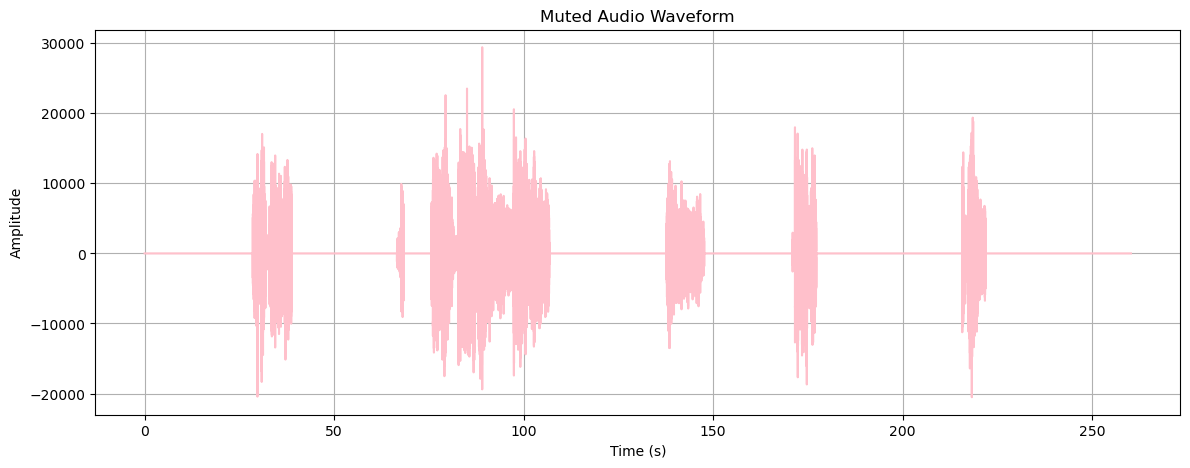

In [ ]:
plot_muted_audio(dg_muted_audio)

In [ ]:
dg_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/dg/dg_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/dg/dg_muted_output.mp3'>

In [ ]:
aj_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj/AJ_TP_audio_15.mp3", aj_laugh_times)

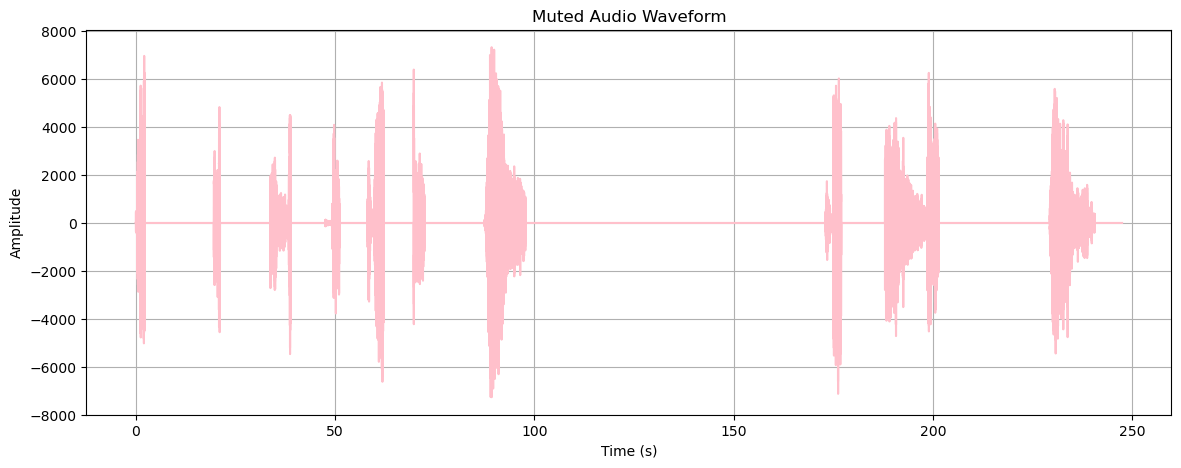

In [ ]:
plot_muted_audio(aj_muted_audio)

In [ ]:
aj_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj/aj_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj/aj_muted_output.mp3'>

In [ ]:
cp_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/cp/CP_OTG_audio_18.mp3", cp_laugh_times)

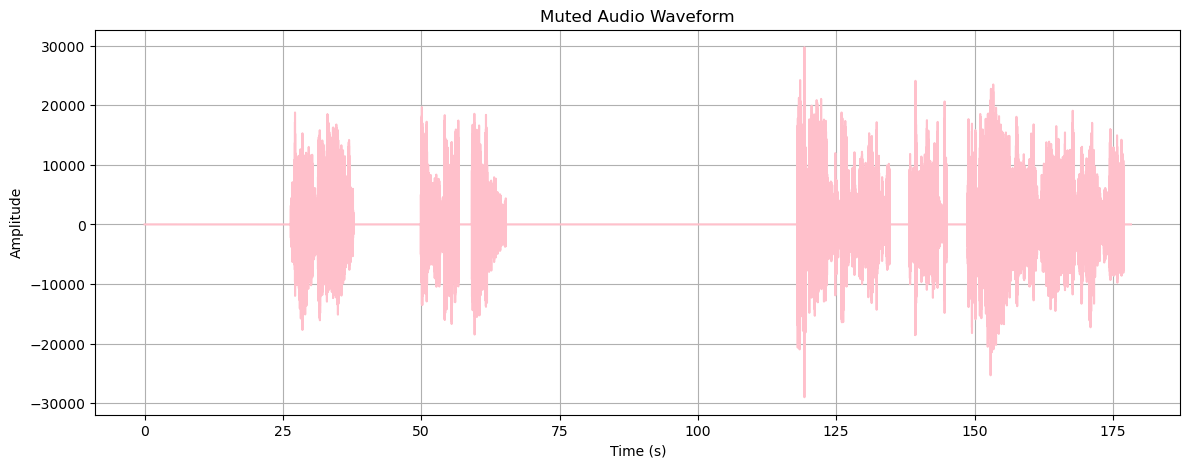

In [ ]:
plot_muted_audio(cp_muted_audio)

In [ ]:
cp_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/cp/cp_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/cp/cp_muted_output.mp3'>

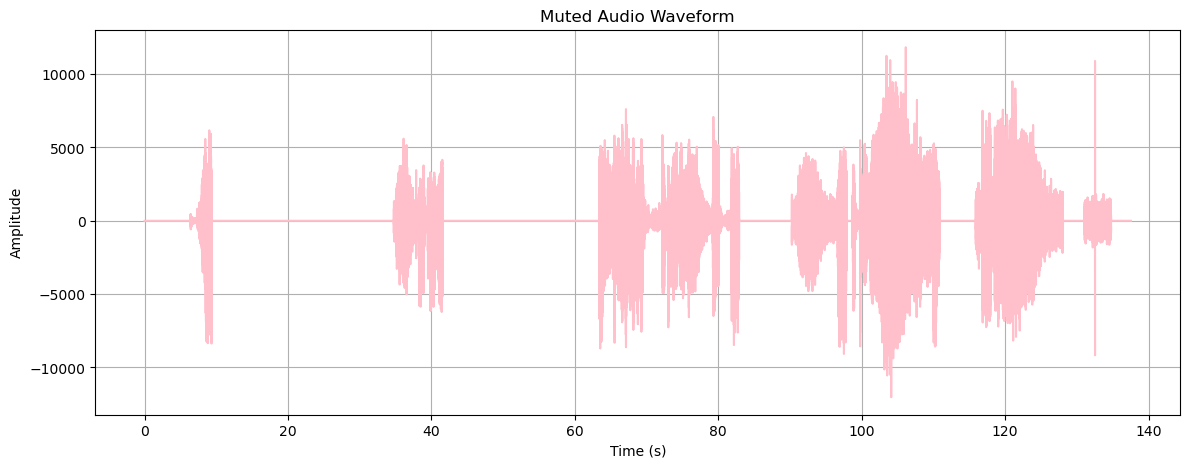

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/lck/lck_muted_output.mp3'>

In [ ]:
lck_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/lck/LCK_SY_audio_06.mp3", lck_laugh_times)
plot_muted_audio(lck_muted_audio)
lck_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/lck/lck_muted_output.mp3", format="mp3")

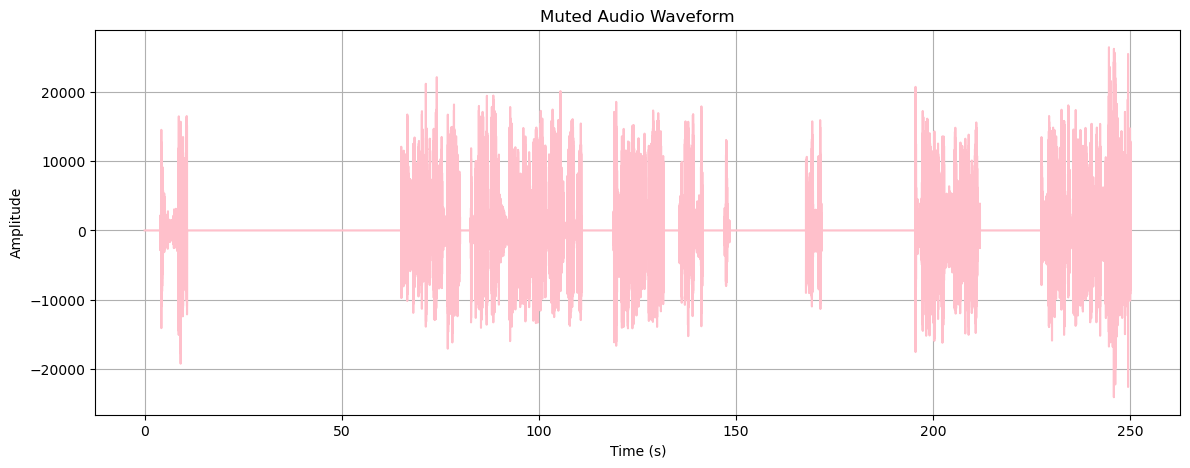

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jm/jm_muted_output.mp3'>

In [ ]:
jm_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jm/JM_KDRC_audio_12.mp3", jm_laugh_times)
plot_muted_audio(jm_muted_audio)
jm_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jm/jm_muted_output.mp3", format="mp3")

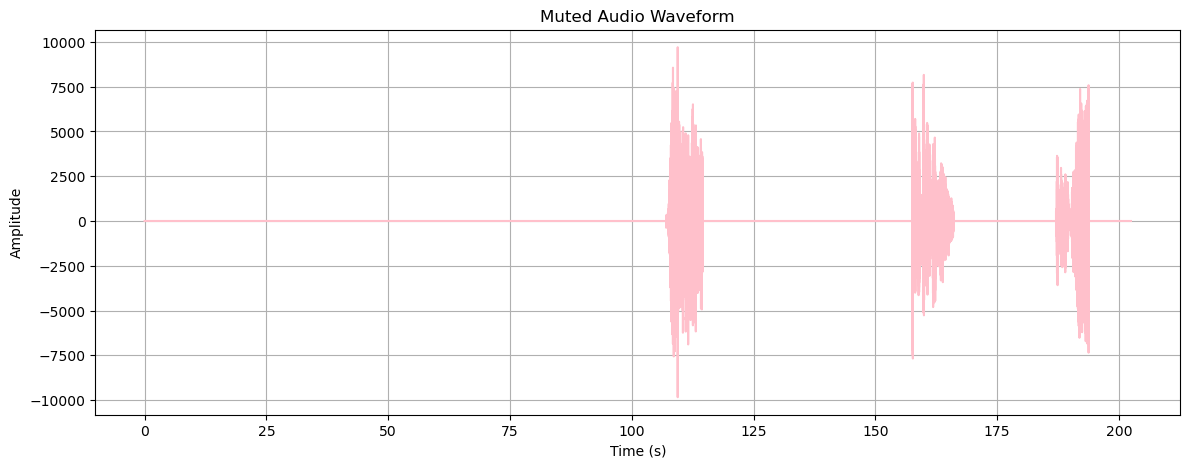

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3'>

In [16]:
aj2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ_TP_audio_25.mp3", aj2_laugh_times)
plot_muted_audio(aj2_muted_audio)
aj2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3", format="mp3")

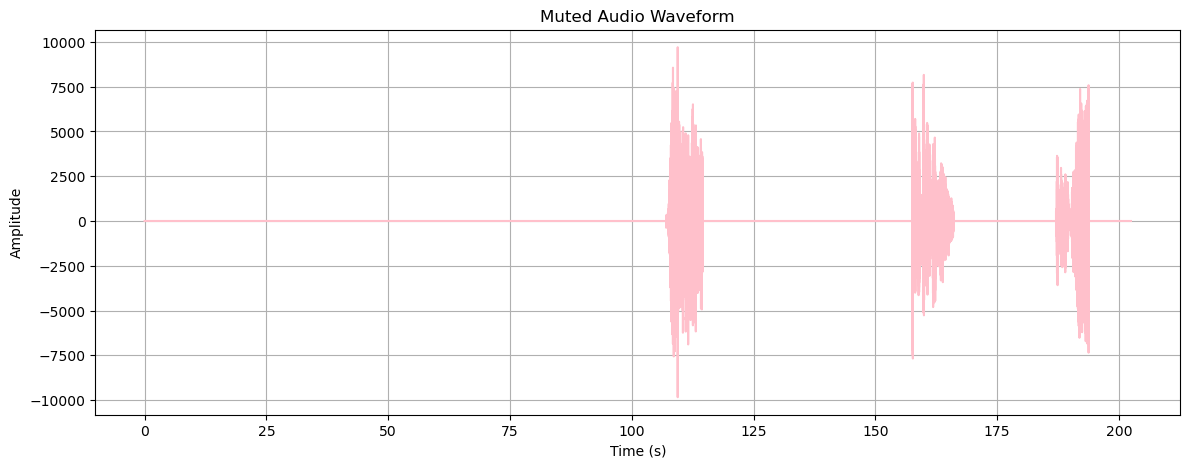

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3'>

In [26]:
aj2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ_TP_audio_25.mp3", aj2_laugh_times)
plot_muted_audio(aj2_muted_audio)
aj2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3", format="mp3")

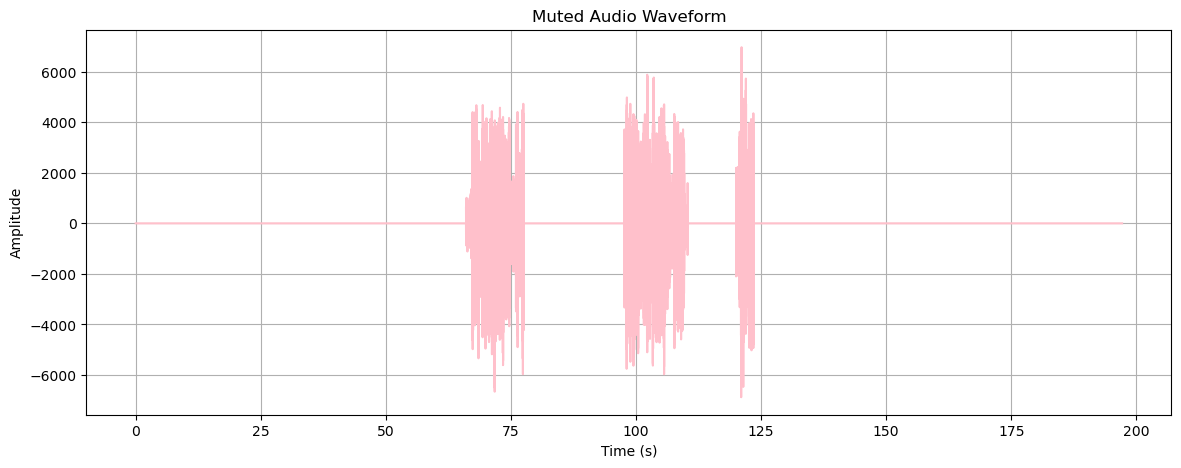

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aw/aw_muted_audio.mp3'>

In [25]:
aw_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aw/AW_BC_audio_04.mp3", aw_laugh_times)
plot_muted_audio(aw_muted_audio)
aw_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aw/aw_muted_audio.mp3", format="mp3")

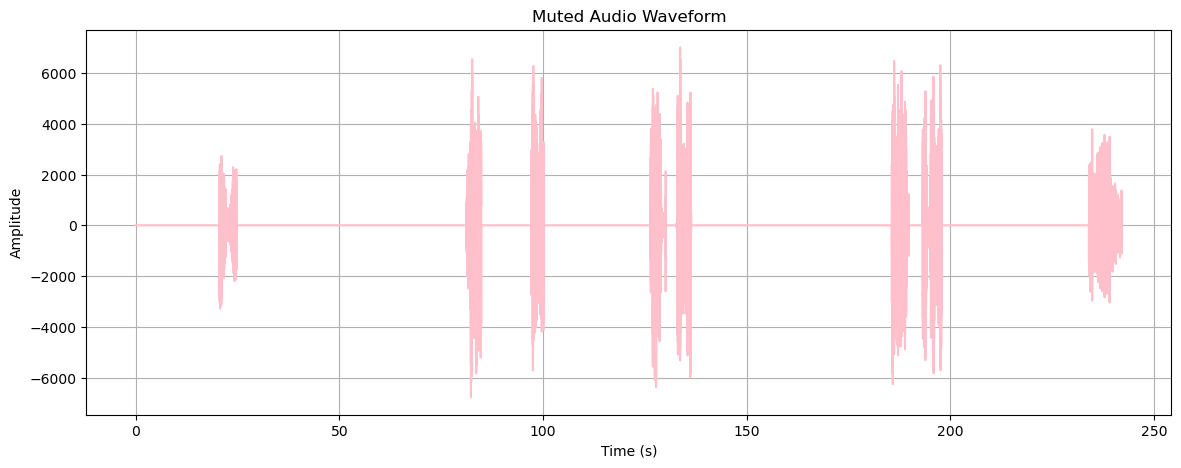

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aw2/aw2_muted_audio.mp3'>

In [32]:
aw2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aw2/AW_BC_audio_25.mp3", aw2_laugh_times)
plot_muted_audio(aw2_muted_audio)
aw2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aw2/aw2_muted_audio.mp3", format="mp3")

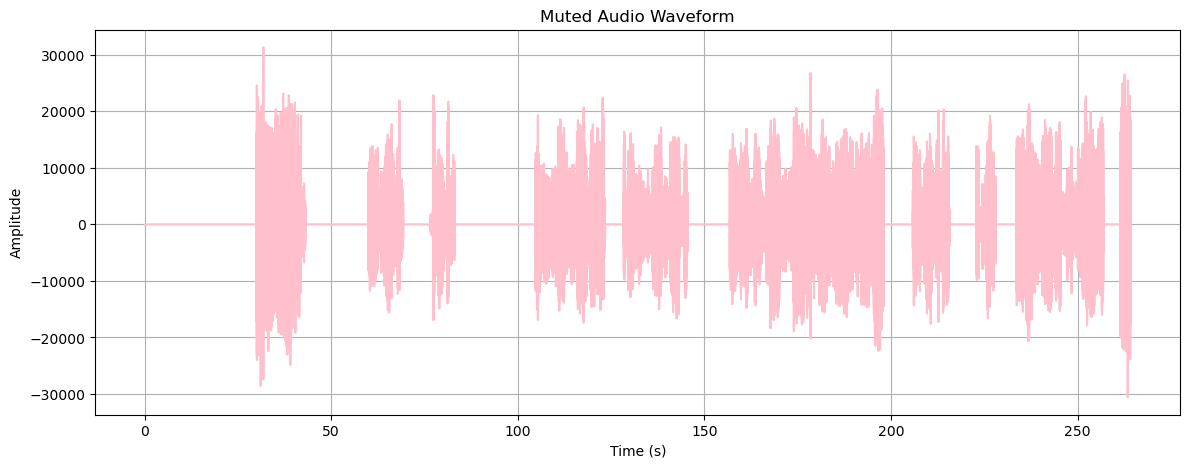

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/cp2/cp2_muted_audio.mp3'>

In [33]:
cp2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/cp2/CP_OTG_audio_07.mp3", cp2_laugh_times)
plot_muted_audio(cp2_muted_audio)
cp2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/cp2/cp2_muted_audio.mp3", format="mp3")

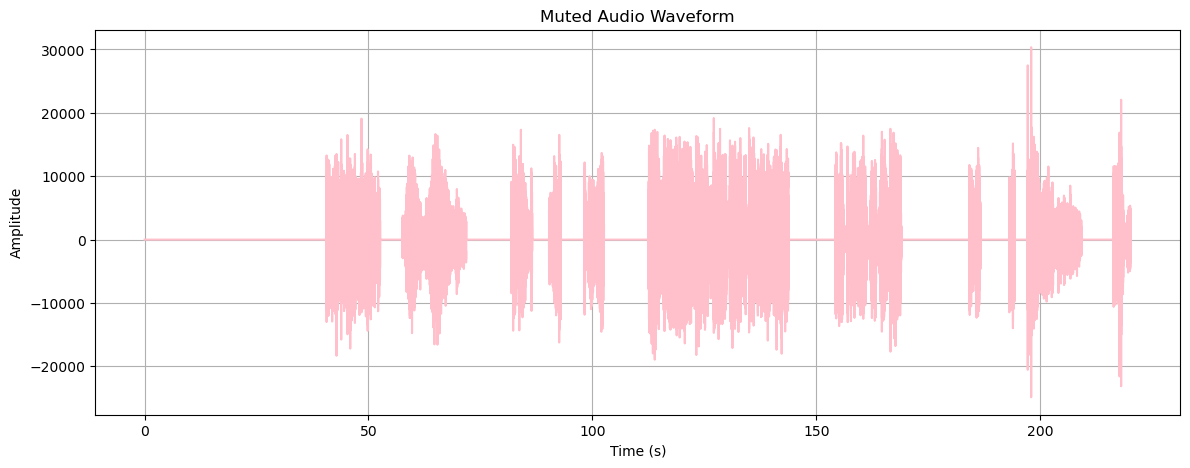

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/dg2/dg2_muted_audio.mp3'>

In [60]:
dg2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/dg2/DG_W_audio_07.mp3", dg2_laugh_times)
plot_muted_audio(dg2_muted_audio)
dg2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/dg2/dg2_muted_audio.mp3", format="mp3")

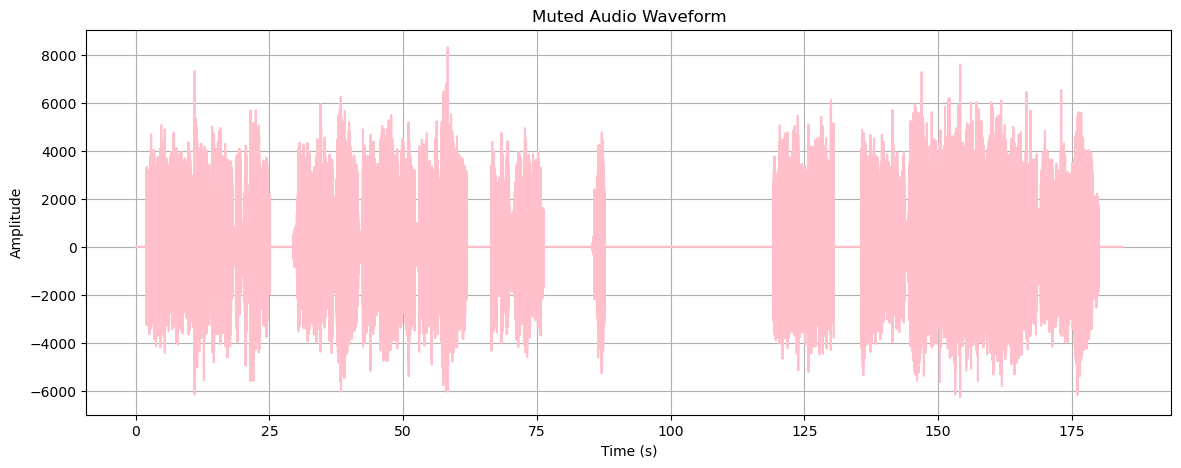

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/hm/hm_muted_audio.mp3'>

In [61]:
hm_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/hm/HM_HK_audio_05.mp3", hm_laugh_times)
plot_muted_audio(hm_muted_audio)
hm_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/hm/hm_muted_audio.mp3", format="mp3")

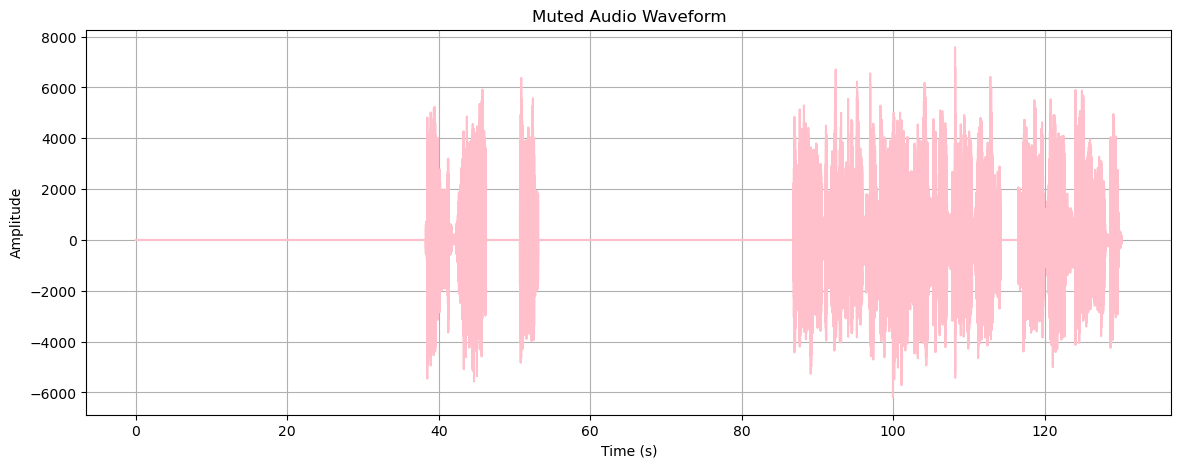

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/hm2/hm2_muted_audio.mp3'>

In [62]:
hm2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/hm2/HM_HK_audio_22.mp3", hm2_laugh_times)
plot_muted_audio(hm2_muted_audio)
hm2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/hm2/hm2_muted_audio.mp3", format="mp3")

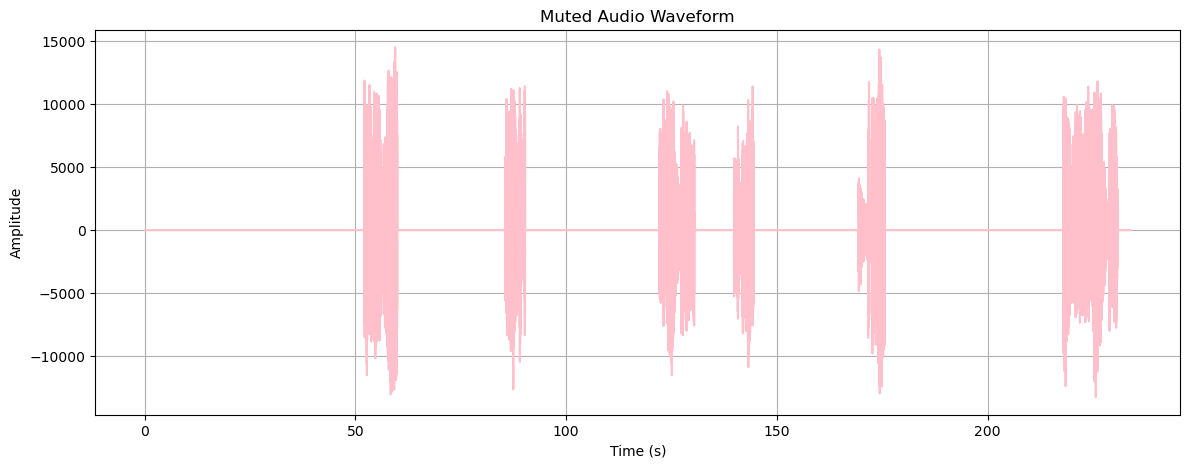

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/is/is_muted_audio.mp3'>

In [63]:
is_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/is/IS_EM_audio_18.mp3", is_laugh_times)
plot_muted_audio(is_muted_audio)
is_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/is/is_muted_audio.mp3", format="mp3")

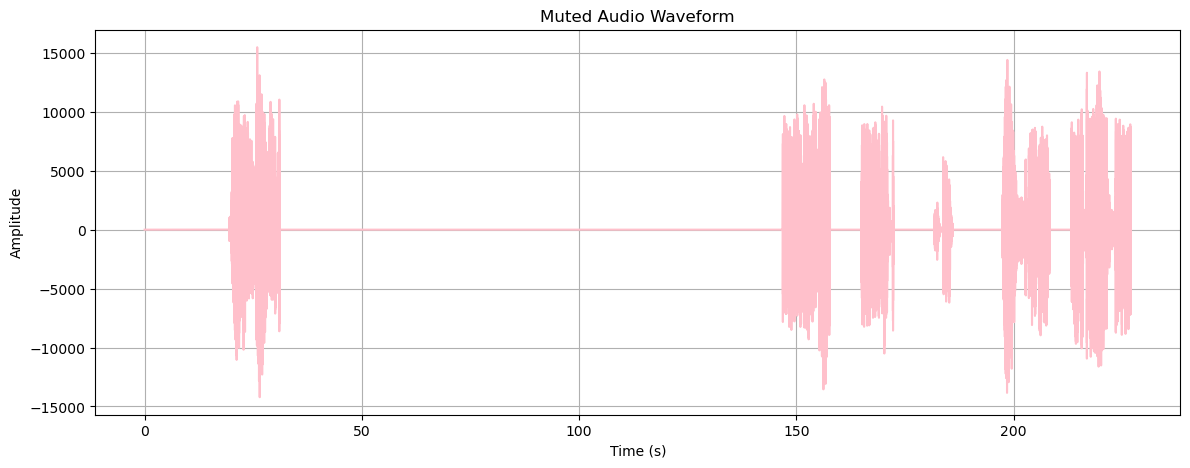

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/is2/is2_muted_audio.mp3'>

In [64]:
is2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/is2/IS_EM_audio_20.mp3", is2_laugh_times)
plot_muted_audio(is2_muted_audio)
is2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/is2/is2_muted_audio.mp3", format="mp3")

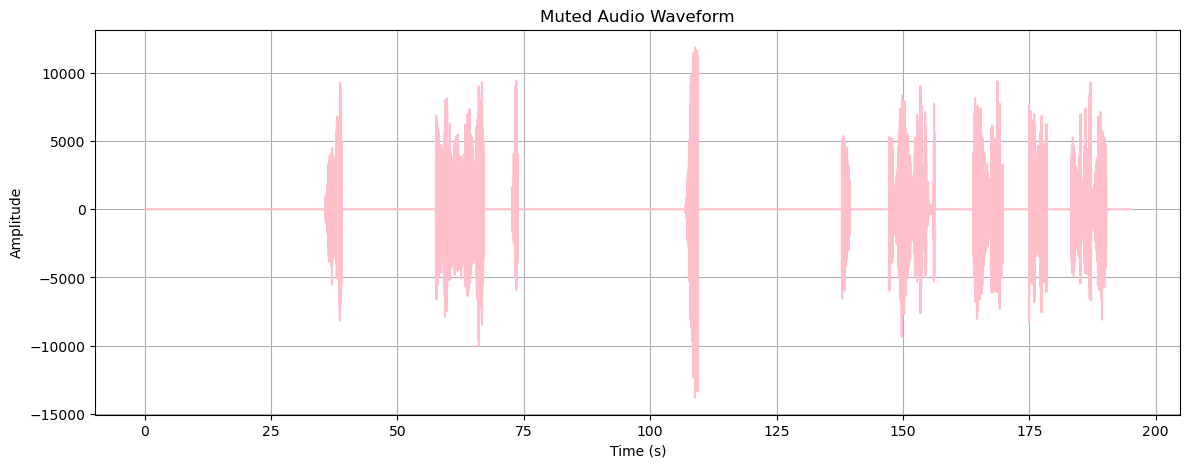

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jg/jg_muted_audio.mp3'>

In [65]:
jg_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jg/JG_QT_audio_03.mp3", jg_laugh_times)
plot_muted_audio(jg_muted_audio)
jg_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jg/jg_muted_audio.mp3", format="mp3")

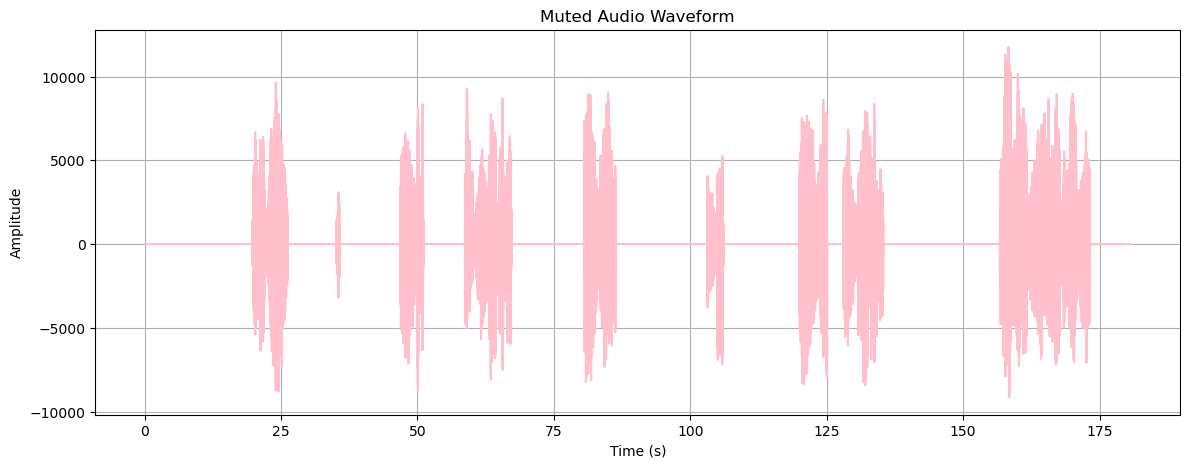

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jg2/jg2_muted_audio.mp3'>

In [66]:
jg2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jg2/JG_QT_audio_14.mp3", jg2_laugh_times)
plot_muted_audio(jg2_muted_audio)
jg2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jg2/jg2_muted_audio.mp3", format="mp3")

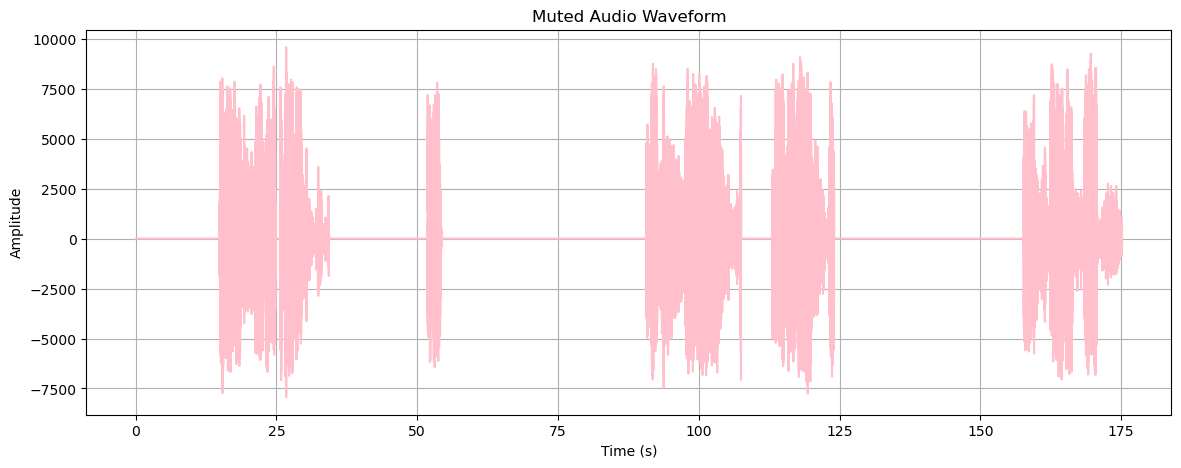

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/ji/jl_muted_audio.mp3'>

In [67]:
jl_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/ji/JL_IHM_audio_11.mp3", jl_laugh_times)
plot_muted_audio(jl_muted_audio)
jl_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/ji/jl_muted_audio.mp3", format="mp3")

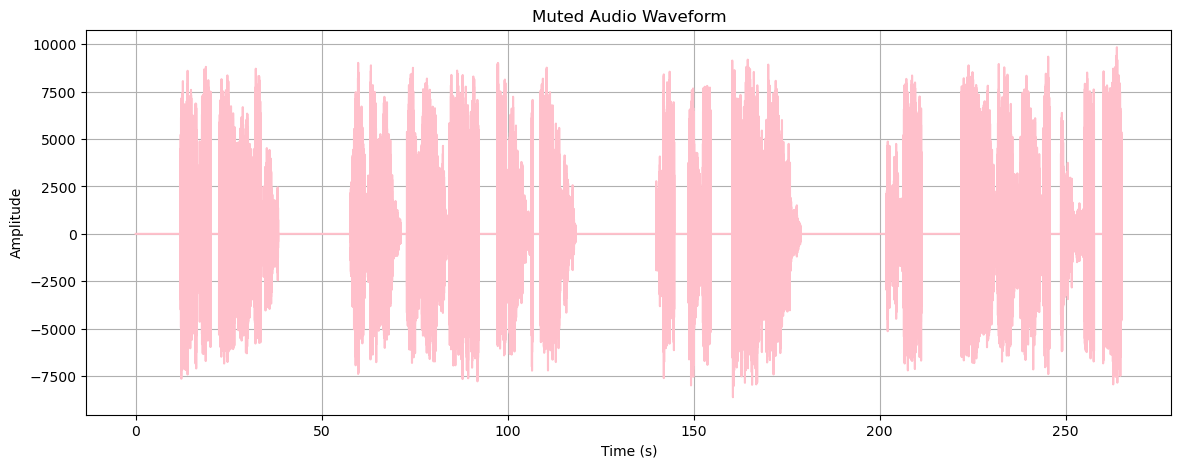

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/ji2/jl2_muted_audio.mp3'>

In [68]:
jl2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/ji2/JL_IHM_audio_02.mp3", jl2_laugh_times)
plot_muted_audio(jl2_muted_audio)
jl2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/ji2/jl2_muted_audio.mp3", format="mp3")

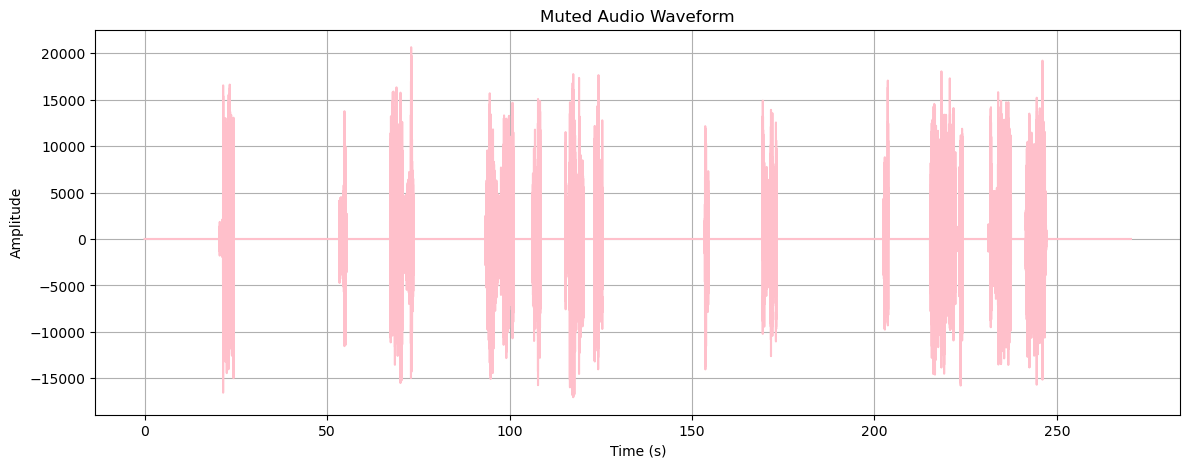

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jm2/jm2_muted_audio.mp3'>

In [69]:
jm2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jm2/JM_KDRC_audio_06.mp3", jm2_laugh_times)
plot_muted_audio(jm2_muted_audio)
jm2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jm2/jm2_muted_audio.mp3", format="mp3")

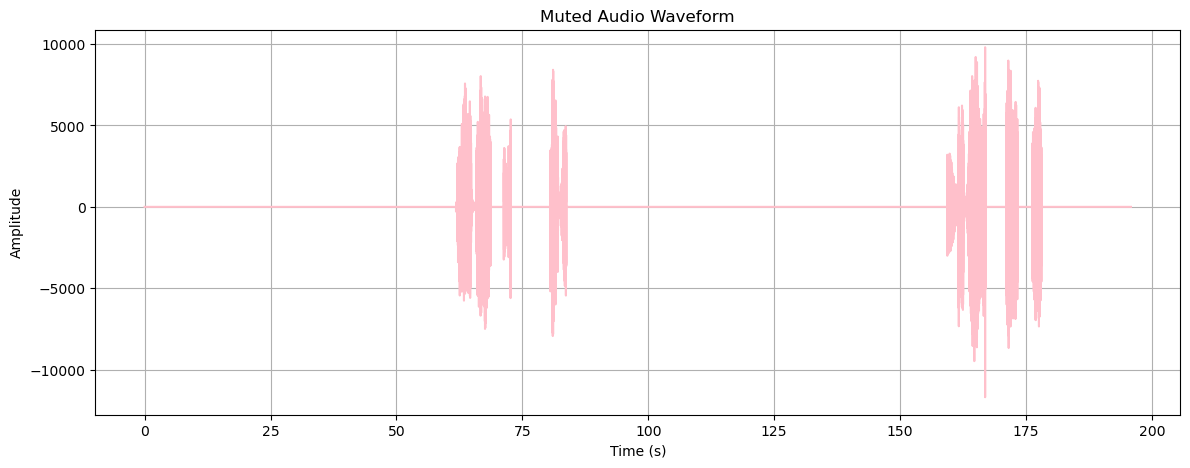

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jy/jy_muted_audio.mp3'>

In [70]:
jy_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jy/JY_GD_audio_09.mp3", jy_laugh_times)
plot_muted_audio(jy_muted_audio)
jy_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jy/jy_muted_audio.mp3", format="mp3")

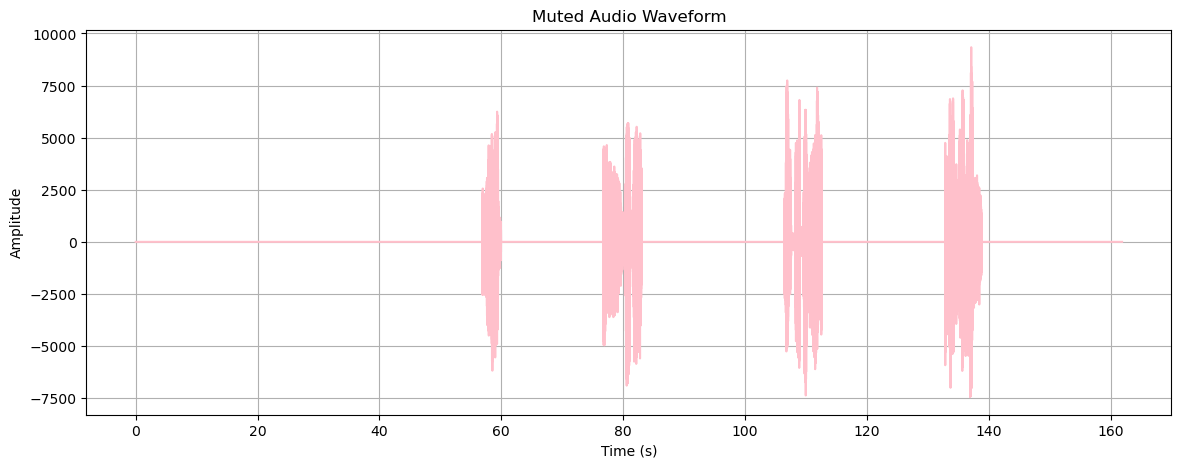

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jy2/jy2_muted_audio.mp3'>

In [71]:
jy2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jy2/JY_GD_audio_19.mp3", jy2_laugh_times)
plot_muted_audio(jy2_muted_audio)
jy2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jy2/jy2_muted_audio.mp3", format="mp3")

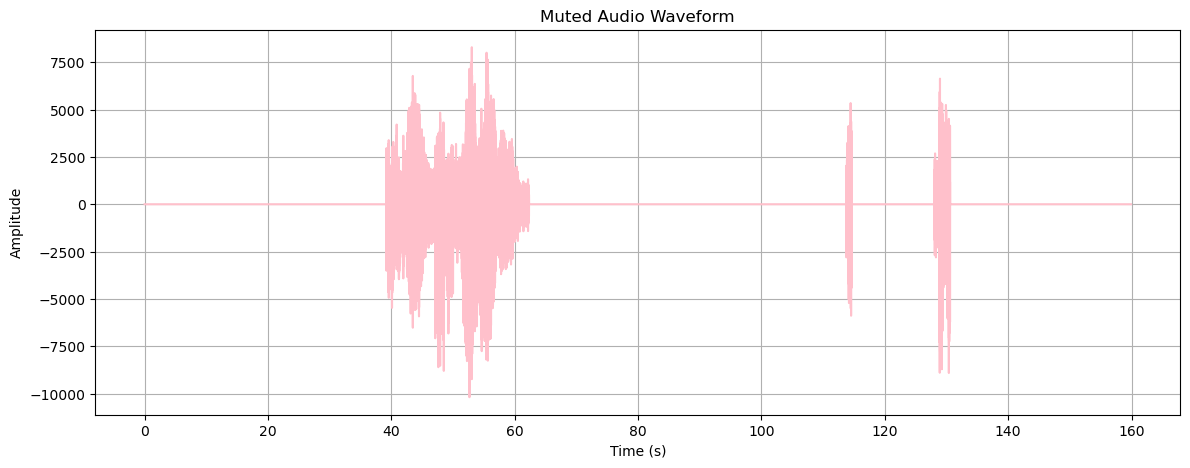

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/lck2/lck2_muted_audio.mp3'>

In [72]:
lck2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/lck2/LCK_SY_audio_20.mp3", lck2_laugh_times)
plot_muted_audio(lck2_muted_audio)
lck2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/lck2/lck2_muted_audio.mp3", format="mp3")

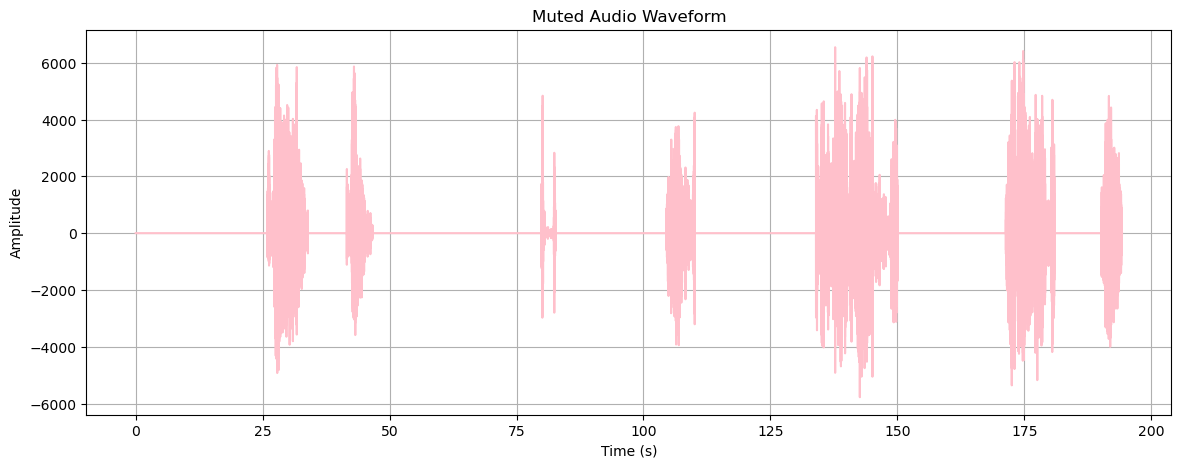

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/nb/nb_muted_audio.mp3'>

In [73]:
nb_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/nb/NB_TGAA_audio_09.mp3", nb_laugh_times)
plot_muted_audio(nb_muted_audio)
nb_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/nb/nb_muted_audio.mp3", format="mp3")

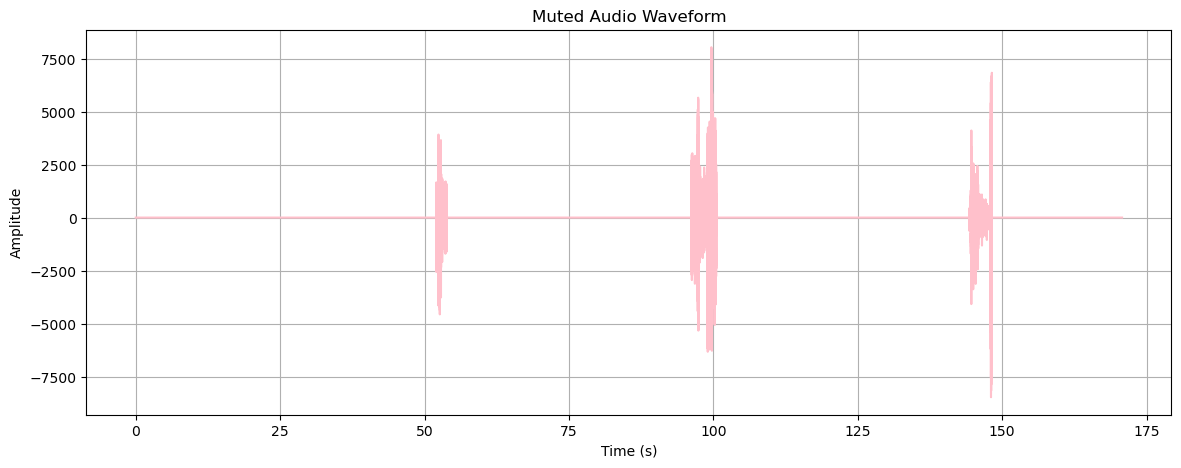

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/nb_tk/nb_tk_muted_audio.mp3'>

In [75]:
nb_tk_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/nb_tk/NB_TK_audio_20.mp3", nb_tk_laugh_times)
plot_muted_audio(nb_tk_muted_audio)
nb_tk_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/nb_tk/nb_tk_muted_audio.mp3", format="mp3")

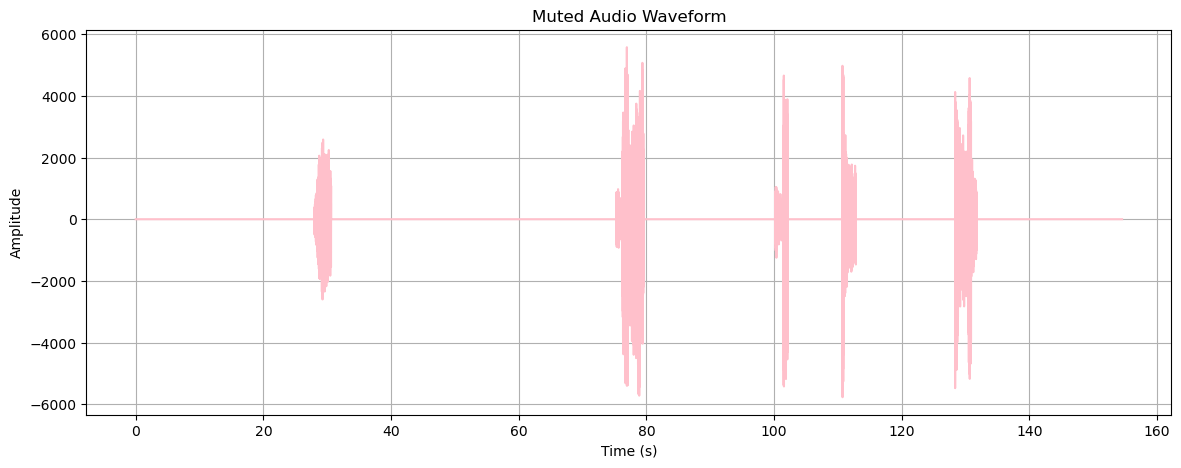

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/nb_tk2/nb_tk2_muted_audio.mp3'>

In [76]:
nb_tk2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/nb_tk2/NB_TK_audio_17.mp3", nb_tk2_laugh_times)
plot_muted_audio(nb_tk2_muted_audio)
nb_tk2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/nb_tk2/nb_tk2_muted_audio.mp3", format="mp3")

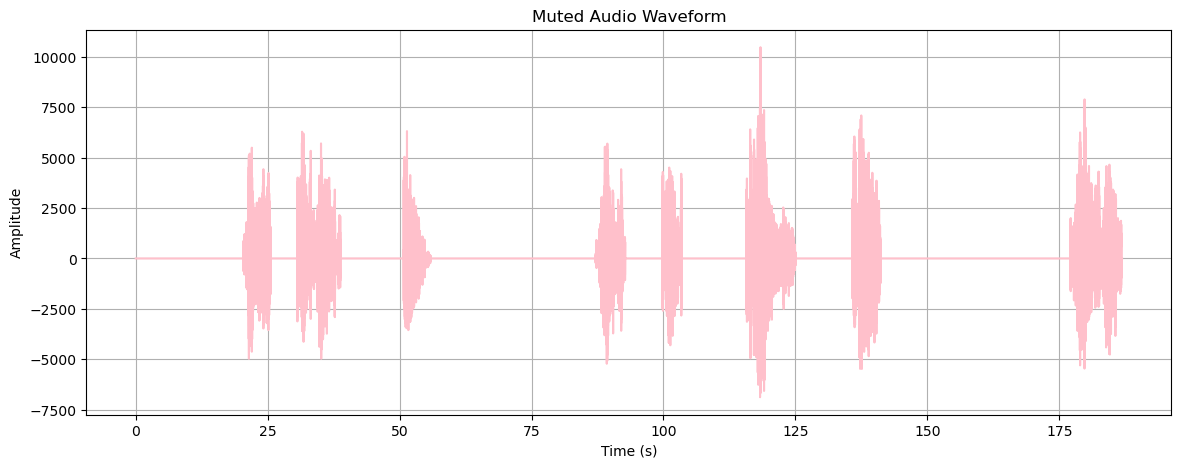

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/nb2/nb2_muted_audio.mp3'>

In [77]:
nb2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/nb2/NB_TGAA_audio_14.mp3", nb2_laugh_times)
plot_muted_audio(nb2_muted_audio)
nb2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/nb2/nb2_muted_audio.mp3", format="mp3")

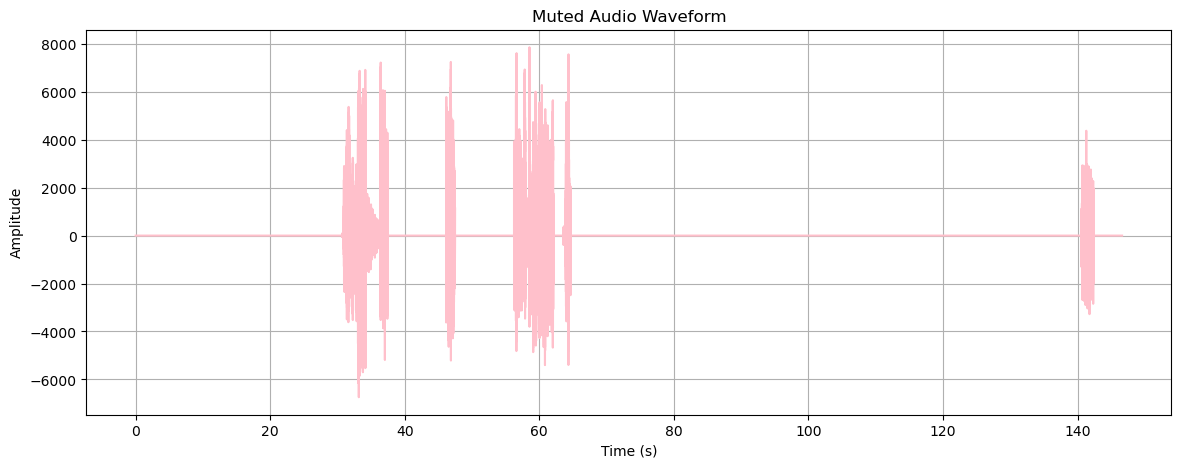

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/rp/rp_muted_audio.mp3'>

In [78]:
rp_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/rp/RP_DP_audio_06.mp3", rp_laugh_times)
plot_muted_audio(rp_muted_audio)
rp_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/rp/rp_muted_audio.mp3", format="mp3")

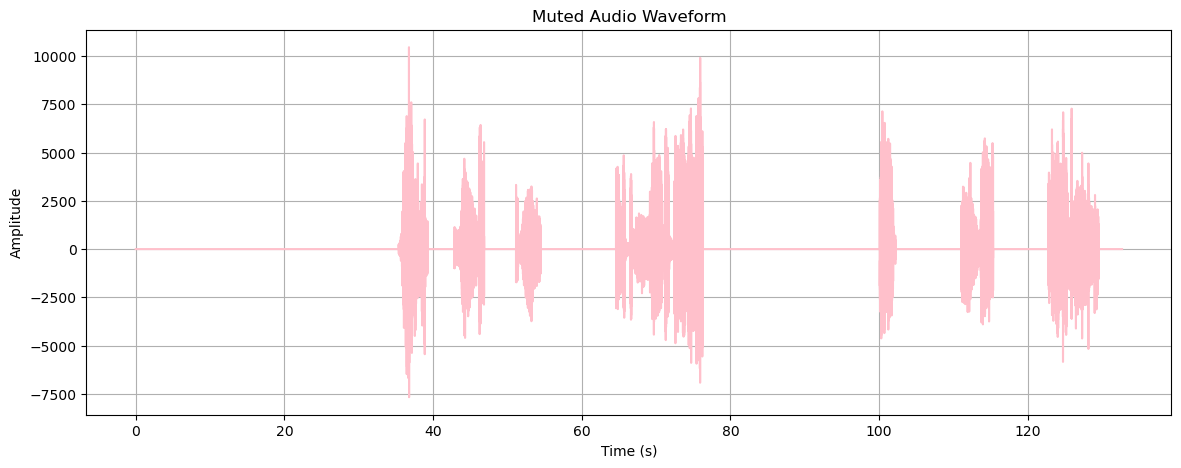

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/rp2/rp2_muted_audio.mp3'>

In [79]:
rp2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/rp2/RP_DP_audio_21.mp3", rp2_laugh_times)
plot_muted_audio(rp2_muted_audio)
rp2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/rp2/rp2_muted_audio.mp3", format="mp3")

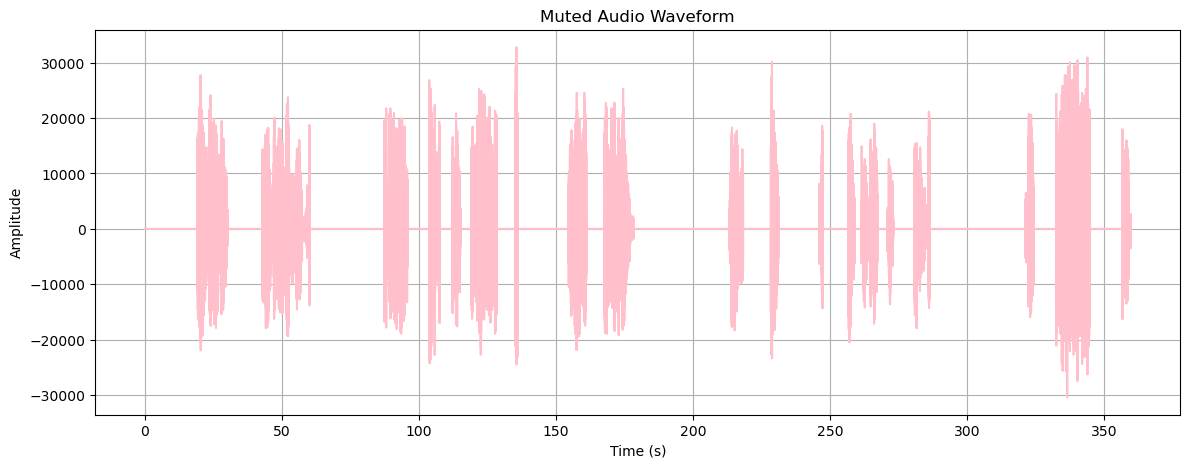

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/sm/sm_muted_audio.mp3'>

In [80]:
sm_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/sm/SM_IGT_audio_04.mp3", sm_laugh_times)
plot_muted_audio(sm_muted_audio)
sm_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/sm/sm_muted_audio.mp3", format="mp3")

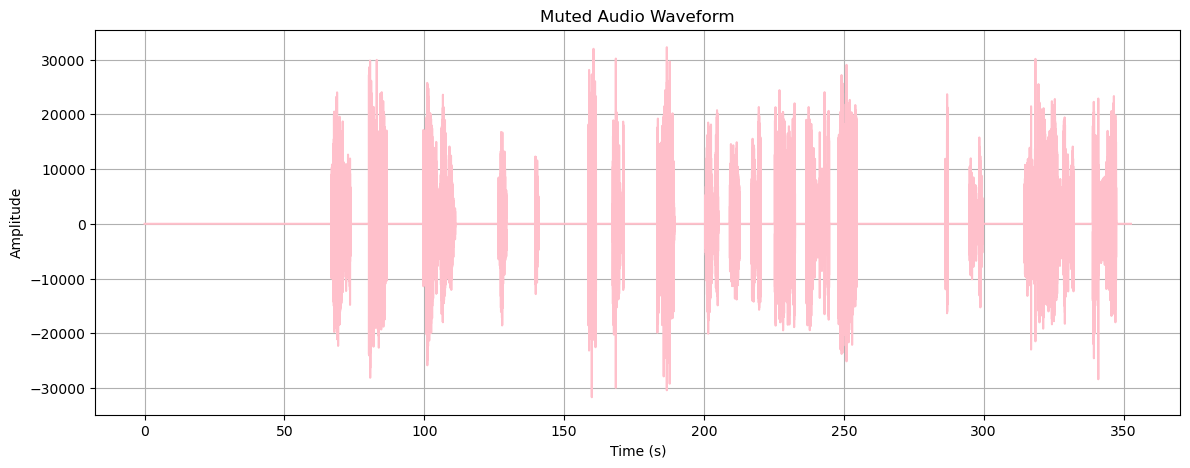

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/sm2/sm2_muted_audio.mp3'>

In [81]:
sm2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/sm2/SM_IGT_audio_13.mp3", sm2_laugh_times)
plot_muted_audio(sm2_muted_audio)
sm2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/sm2/sm2_muted_audio.mp3", format="mp3")

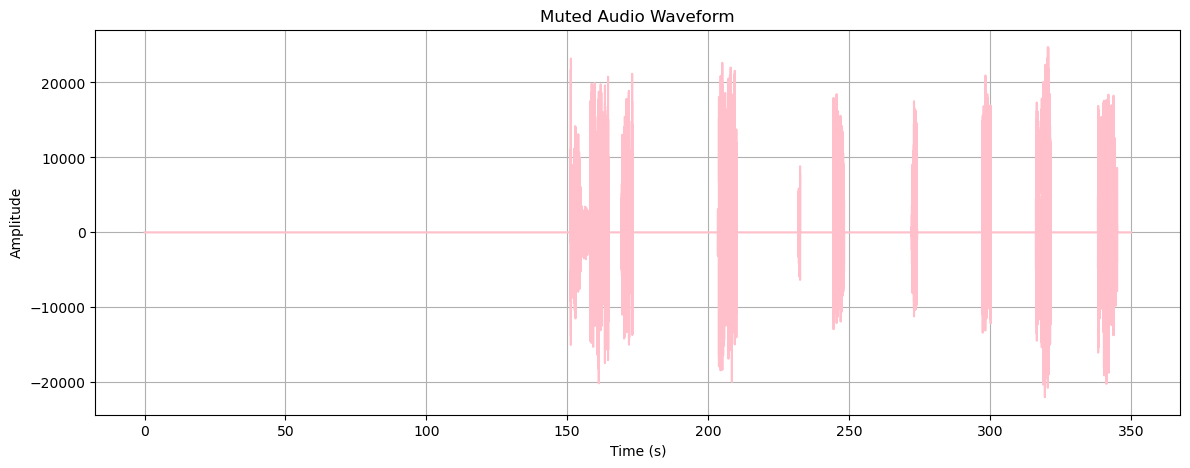

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/tn/tn_muted_audio.mp3'>

In [82]:
tn_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/tn/TN_AD_audio_16.mp3", tn_laugh_times)
plot_muted_audio(tn_muted_audio)
tn_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/tn/tn_muted_audio.mp3", format="mp3")

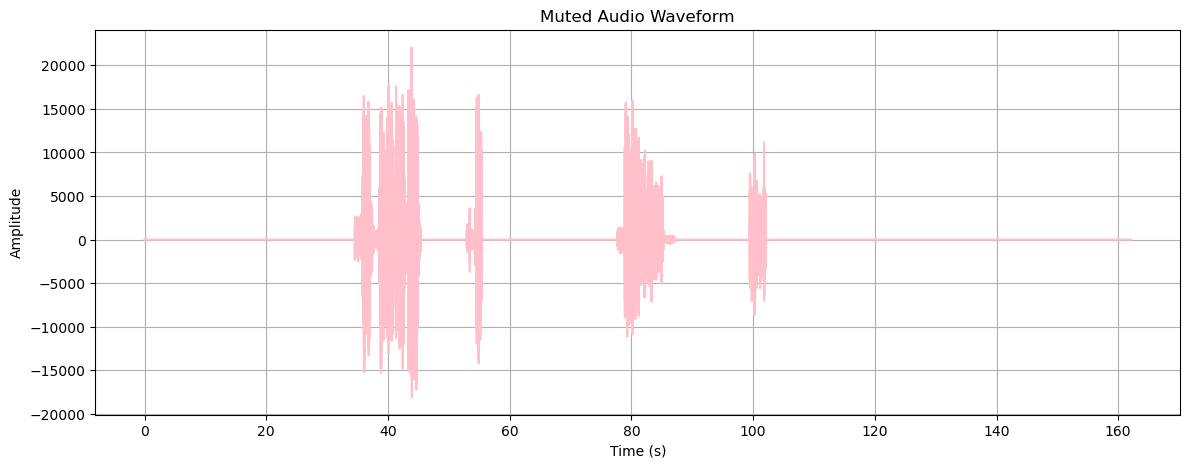

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/tn2/tn2_muted_audio.mp3'>

In [84]:
tn2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/tn2/TN_AD_audio_14.mp3", tn2_laugh_times)
plot_muted_audio(tn2_muted_audio)
tn2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/tn2/tn2_muted_audio.mp3", format="mp3")

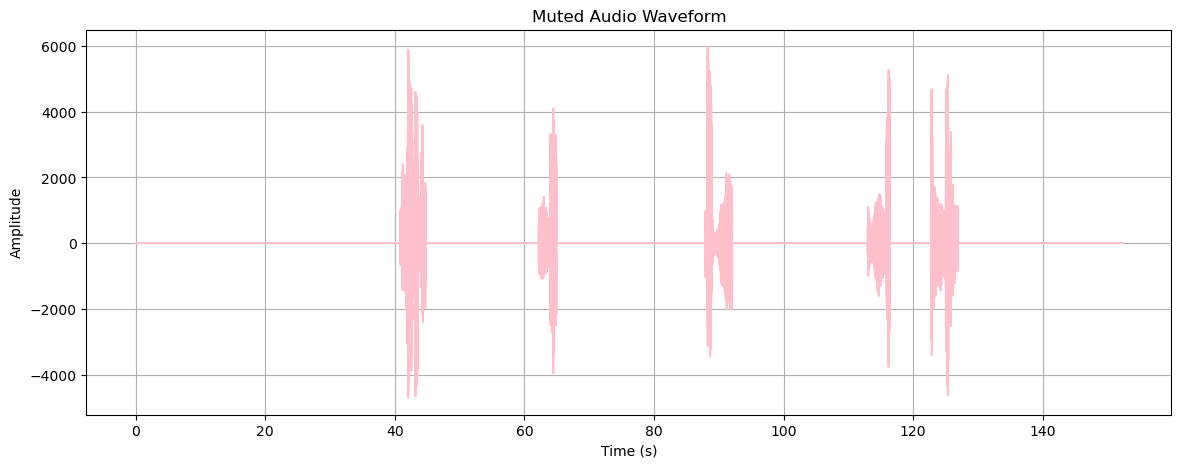

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/ts/ts_muted_audio.mp3'>

In [85]:
ts_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/ts/TS_D_audio_09.mp3", ts_laugh_times)
plot_muted_audio(ts_muted_audio)
ts_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/ts/ts_muted_audio.mp3", format="mp3")

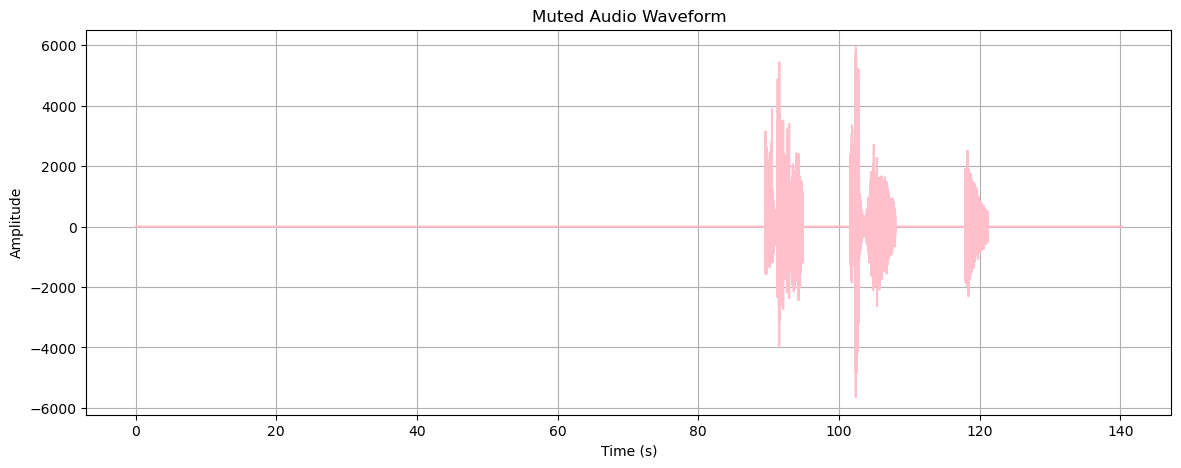

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/ts2/ts2_muted_audio.mp3'>

In [86]:
ts2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/ts2/TS_D_audio_15.mp3", ts2_laugh_times)
plot_muted_audio(ts2_muted_audio)
ts2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/ts2/ts2_muted_audio.mp3", format="mp3")